Below we apply K means clustering techniques to cluter countries and areas using non-communicable disease mortality rate. 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
import scipy 

## Data Preprocessing

In [ ]:
from google.colab import files 
uploaded = files.upload()
df_musculoskeletal = pd.read_csv('Musculoskeletal diseases 1.csv', low_memory = False)
df_musculoskeletal.head()



Saving Musculoskeletal diseases 1.csv to Musculoskeletal diseases 1.csv


Region Code Region Name Country Code Country Name  Year  Sex Age group code  \
0          EU      Europe          ALB      Albania  1999  All        Age_all   
1          EU      Europe          ALB      Albania  2000  All        Age_all   
2          EU      Europe          ALB      Albania  2001  All        Age_all   
3          EU      Europe          ALB      Albania  2002  All        Age_all   
4          EU      Europe          ALB      Albania  2003  All        Age_all   

  Age Group  Number  Percentage of cause-specific deaths out of total deaths  \
0     [All]      24                                           0.156863         
1     [All]      26                                           0.158430         
2     [All]      33                                           0.217922         
3     [All]      40                                           0.246184         
4     [All]      41                                           0.228222         

   Age-standardized death rate per 100 000 standard population  \
0                                           0.944580             
1                                           1.092300             
2                                           1.174009             
3                                           1.421195             
4                                           1.437520             

   Death rate per 100 000 population  
0                           0.711448  
1                           0.834939  
2                           1.075172  
3                           1.296954  
4                           1.321402

In [ ]:
df_musculoskeletal = df_musculoskeletal[['Country Name', 'Year','Percentage of cause-specific deaths out of total deaths',
                                         'Age-standardized death rate per 100 000 standard population',
                                         'Death rate per 100 000 population']]

#df_musculoskeletal.columns = ['Country Name', 'Year', 'Musculoskeletal Mortality Rate', 'Musculoskeletal Standardized Mortality', 
                              #'Musculoskeletal Mortality per 100000 population']

df_musculoskeletal.rename(columns={'Percentage of cause-specific deaths out of total deaths': 'Musculoskeletal Mortality Rate',
                                                        'Age-standardized death rate per 100 000 standard population': 'Musculoskeletal Standardized Mortality',
                                                        'Death rate per 100 000 population': 'Musculoskeletal Mortality per 100000 population'
                                                        } ,inplace=True) 
df_musculoskeletal.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country Name  Year  Musculoskeletal Mortality Rate  \
0      Albania  1999                        0.156863   
1      Albania  2000                        0.158430   
2      Albania  2001                        0.217922   
3      Albania  2002                        0.246184   
4      Albania  2003                        0.228222   

   Musculoskeletal Standardized Mortality  \
0                                0.944580   
1                                1.092300   
2                                1.174009   
3                                1.421195   
4                                1.437520   

   Musculoskeletal Mortality per 100000 population  
0                                         0.711448  
1                                         0.834939  
2                                         1.075172  
3                                         1.296954  
4                                         1.321402

In [ ]:
from google.colab import files 
uploaded = files.upload()
df_genitourinary = pd.read_csv('Genitourinary diseases 1.csv', low_memory = False)
df_genitourinary.head()


Saving Genitourinary diseases 1.csv to Genitourinary diseases 1.csv


Region Code Region Name Country Code Country Name  Year  Sex Age group code  \
0          EU      Europe          ALB      Albania  1999  All        Age_all   
1          EU      Europe          ALB      Albania  2000  All        Age_all   
2          EU      Europe          ALB      Albania  2001  All        Age_all   
3          EU      Europe          ALB      Albania  2002  All        Age_all   
4          EU      Europe          ALB      Albania  2003  All        Age_all   

  Age Group  Number  Percentage of cause-specific deaths out of total deaths  \
0     [All]     248                                           1.620915         
1     [All]     283                                           1.724453         
2     [All]     327                                           2.159414         
3     [All]     279                                           1.717134         
4     [All]     259                                           1.441692         

   Age-standardized death rate per 100 000 standard population  \
0                                           9.256352             
1                                          11.730877             
2                                          11.686393             
3                                           9.886593             
4                                           9.055065             

   Death rate per 100 000 population  
0                           7.351633  
1                           9.087990  
2                          10.653982  
3                           9.046253  
4                           8.347396

In [ ]:
df_genitourinary = df_genitourinary[['Percentage of cause-specific deaths out of total deaths',
                                         'Age-standardized death rate per 100 000 standard population',
                                         'Death rate per 100 000 population']]
df_genitourinary.head()

Percentage of cause-specific deaths out of total deaths  \
0                                           1.620915         
1                                           1.724453         
2                                           2.159414         
3                                           1.717134         
4                                           1.441692         

   Age-standardized death rate per 100 000 standard population  \
0                                           9.256352             
1                                          11.730877             
2                                          11.686393             
3                                           9.886593             
4                                           9.055065             

   Death rate per 100 000 population  
0                           7.351633  
1                           9.087990  
2                          10.653982  
3                           9.046253  
4                           8.347396

In [ ]:
df_genitourinary.rename(columns={'Percentage of cause-specific deaths out of total deaths': 'Genitourinary Mortality Rate',
                                                        'Age-standardized death rate per 100 000 standard population': 'Genitourinary Standardized Mortality',
                                                        'Death rate per 100 000 population': 'Genitourinary Mortality per 100000 population'
                                                        } ,inplace=True) 
df_genitourinary.head()

Genitourinary Mortality Rate  Genitourinary Standardized Mortality  \
0                      1.620915                              9.256352   
1                      1.724453                             11.730877   
2                      2.159414                             11.686393   
3                      1.717134                              9.886593   
4                      1.441692                              9.055065   

   Genitourinary Mortality per 100000 population  
0                                       7.351633  
1                                       9.087990  
2                                      10.653982  
3                                       9.046253  
4                                       8.347396

In [ ]:
from google.colab import files 
uploaded = files.upload()
df_digest = pd.read_csv('Digestive diseases.csv', low_memory = False)
df_digest.head()


Saving Digestive diseases.csv to Digestive diseases.csv


Region Code Region Name Country Code Country Name  Year  Sex Age group code  \
0          EU      Europe          ALB      Albania  1999  All        Age_all   
1          EU      Europe          ALB      Albania  2000  All        Age_all   
2          EU      Europe          ALB      Albania  2001  All        Age_all   
3          EU      Europe          ALB      Albania  2002  All        Age_all   
4          EU      Europe          ALB      Albania  2003  All        Age_all   

  Age Group  Number  Percentage of cause-specific deaths out of total deaths  \
0     [All]     339                                           2.215686         
1     [All]     341                                           2.077875         
2     [All]     329                                           2.172621         
3     [All]     305                                           1.877154         
4     [All]     311                                           1.731144         

   Age-standardized death rate per 100 000 standard population  \
0                                          12.567855             
1                                          14.276391             
2                                          11.662889             
3                                          10.743199             
4                                          10.838188             

   Death rate per 100 000 population  
0                          10.049209  
1                          10.950546  
2                          10.719144  
3                           9.889273  
4                          10.023321

In [ ]:
df_digest = df_digest[['Percentage of cause-specific deaths out of total deaths',
                                         'Age-standardized death rate per 100 000 standard population',
                                         'Death rate per 100 000 population']]
df_digest.head()

Percentage of cause-specific deaths out of total deaths  \
0                                           2.215686         
1                                           2.077875         
2                                           2.172621         
3                                           1.877154         
4                                           1.731144         

   Age-standardized death rate per 100 000 standard population  \
0                                          12.567855             
1                                          14.276391             
2                                          11.662889             
3                                          10.743199             
4                                          10.838188             

   Death rate per 100 000 population  
0                          10.049209  
1                          10.950546  
2                          10.719144  
3                           9.889273  
4                          10.023321

In [ ]:
df_digest.rename(columns={'Percentage of cause-specific deaths out of total deaths': 'Digestive Mortality Rate',
                                                        'Age-standardized death rate per 100 000 standard population': 'Digestive Standardized Mortality',
                                                        'Death rate per 100 000 population': 'Digestive Mortality per 100000 population'
                                                        } ,inplace=True) 
df_digest.head()

Digestive Mortality Rate  Digestive Standardized Mortality  \
0                  2.215686                         12.567855   
1                  2.077875                         14.276391   
2                  2.172621                         11.662889   
3                  1.877154                         10.743199   
4                  1.731144                         10.838188   

   Digestive Mortality per 100000 population  
0                                  10.049209  
1                                  10.950546  
2                                  10.719144  
3                                   9.889273  
4                                  10.023321

In [ ]:
# Merge three datasets
df_merge = pd.concat([df_digest,df_genitourinary,df_musculoskeletal], axis = 1)
df_merge.head()

Digestive Mortality Rate  Digestive Standardized Mortality  \
0                  2.215686                         12.567855   
1                  2.077875                         14.276391   
2                  2.172621                         11.662889   
3                  1.877154                         10.743199   
4                  1.731144                         10.838188   

   Digestive Mortality per 100000 population  Genitourinary Mortality Rate  \
0                                  10.049209                      1.620915   
1                                  10.950546                      1.724453   
2                                  10.719144                      2.159414   
3                                   9.889273                      1.717134   
4                                  10.023321                      1.441692   

   Genitourinary Standardized Mortality  \
0                              9.256352   
1                             11.730877   
2                             11.686393   
3                              9.886593   
4                              9.055065   

   Genitourinary Mortality per 100000 population Country Name  Year  \
0                                       7.351633      Albania  1999   
1                                       9.087990      Albania  2000   
2                                      10.653982      Albania  2001   
3                                       9.046253      Albania  2002   
4                                       8.347396      Albania  2003   

   Musculoskeletal Mortality Rate  Musculoskeletal Standardized Mortality  \
0                        0.156863                                0.944580   
1                        0.158430                                1.092300   
2                        0.217922                                1.174009   
3                        0.246184                                1.421195   
4                        0.228222                                1.437520   

   Musculoskeletal Mortality per 100000 population  
0                                         0.711448  
1                                         0.834939  
2                                         1.075172  
3                                         1.296954  
4                                         1.321402

In [ ]:
# Reorder columns
df_merge = df_merge[['Country Name', 'Year', 'Digestive Mortality Rate', 'Digestive Standardized Mortality','Digestive Mortality per 100000 population',
                    'Genitourinary Mortality Rate', 'Genitourinary Standardized Mortality', 
                    'Genitourinary Mortality per 100000 population', 
                    'Musculoskeletal Mortality Rate', 
                    'Musculoskeletal Standardized Mortality', 
                    'Musculoskeletal Mortality per 100000 population']]

df_merge.head()

Country Name  Year  Digestive Mortality Rate  \
0      Albania  1999                  2.215686   
1      Albania  2000                  2.077875   
2      Albania  2001                  2.172621   
3      Albania  2002                  1.877154   
4      Albania  2003                  1.731144   

   Digestive Standardized Mortality  \
0                         12.567855   
1                         14.276391   
2                         11.662889   
3                         10.743199   
4                         10.838188   

   Digestive Mortality per 100000 population  Genitourinary Mortality Rate  \
0                                  10.049209                      1.620915   
1                                  10.950546                      1.724453   
2                                  10.719144                      2.159414   
3                                   9.889273                      1.717134   
4                                  10.023321                      1.441692   

   Genitourinary Standardized Mortality  \
0                              9.256352   
1                             11.730877   
2                             11.686393   
3                              9.886593   
4                              9.055065   

   Genitourinary Mortality per 100000 population  \
0                                       7.351633   
1                                       9.087990   
2                                      10.653982   
3                                       9.046253   
4                                       8.347396   

   Musculoskeletal Mortality Rate  Musculoskeletal Standardized Mortality  \
0                        0.156863                                0.944580   
1                        0.158430                                1.092300   
2                        0.217922                                1.174009   
3                        0.246184                                1.421195   
4                        0.228222                                1.437520   

   Musculoskeletal Mortality per 100000 population  
0                                         0.711448  
1                                         0.834939  
2                                         1.075172  
3                                         1.296954  
4                                         1.321402

In [ ]:
df_merge.isna().sum()

Country Name                                        0
Year                                                0
Digestive Mortality Rate                            0
Digestive Standardized Mortality                   35
Digestive Mortality per 100000 population          35
Genitourinary Mortality Rate                        0
Genitourinary Standardized Mortality               35
Genitourinary Mortality per 100000 population      35
Musculoskeletal Mortality Rate                      0
Musculoskeletal Standardized Mortality             35
Musculoskeletal Mortality per 100000 population    35
dtype: int64

In [ ]:
# fill missing values 
df_merge['Digestive Standardized Mortality'] = df_merge['Digestive Standardized Mortality'].fillna(df_merge['Digestive Standardized Mortality'].median())
df_merge['Digestive Mortality per 100000 population'] = df_merge['Digestive Mortality per 100000 population'].fillna(df_merge['Digestive Mortality per 100000 population'].median())
df_merge['Genitourinary Standardized Mortality'] =  df_merge['Genitourinary Standardized Mortality'].fillna(df_merge['Genitourinary Standardized Mortality'].median())
df_merge['Genitourinary Mortality per 100000 population'] =  df_merge['Genitourinary Mortality per 100000 population'].fillna(df_merge['Genitourinary Mortality per 100000 population'].median())
df_merge['Musculoskeletal Standardized Mortality'] =  df_merge['Musculoskeletal Standardized Mortality'].fillna(df_merge['Musculoskeletal Standardized Mortality'].median())
df_merge['Musculoskeletal Mortality per 100000 population'] =  df_merge['Musculoskeletal Mortality per 100000 population'].fillna(df_merge['Musculoskeletal Mortality per 100000 population'].median())



In [ ]:
df_merge_numeric = df_merge[['Digestive Mortality Rate', 'Digestive Standardized Mortality','Digestive Mortality per 100000 population',
                    'Genitourinary Mortality Rate', 'Genitourinary Standardized Mortality', 
                    'Genitourinary Mortality per 100000 population', 
                    'Musculoskeletal Mortality Rate', 
                    'Musculoskeletal Standardized Mortality', 
                    'Musculoskeletal Mortality per 100000 population']]

In [ ]:
# Group by countries to see the mortality rate 
countries = df_merge.groupby('Country Name').agg({'Digestive Standardized Mortality':['mean'],'Genitourinary Standardized Mortality':['mean'],
               'Musculoskeletal Standardized Mortality': ['mean'] })
countries = countries.reset_index()
countries.columns = ['Country Name', 'Digestive Average Mortality', 'Genitourinary Average Mortality', 'Musculoskeletal Average Mortality']

In [ ]:
# rank each country by digestive average mortality rate in descending order 
countries1_de = countries.sort_values(by = 'Digestive Average Mortality',  ascending = False)
countries1_de

Country Name  Digestive Average Mortality  \
31                Egypt                    90.347439   
84  Republic of Moldova                    90.239388   
91           Seychelles                    59.119740   
43            Guatemala                    58.985911   
68             Mongolia                    58.612675   
..                  ...                          ...   
0               Albania                    10.058347   
59              Lebanon                     8.854653   
92            Singapore                     8.739712   
48                 Iraq                     7.298608   
66              Mayotte                     7.229112   

    Genitourinary Average Mortality  Musculoskeletal Average Mortality  
31                        33.028044                           0.361367  
84                         7.502225                           0.914399  
91                        40.280142                           0.951607  
43                        26.343994                           2.761304  
68                        12.898236                           2.205443  
..                              ...                                ...  
0                          8.729337                           1.009077  
59                        15.898102                           0.606343  
92                        17.050949                           1.242668  
48                        41.208272                           0.284029  
66                         5.482946                           1.481176  

[113 rows x 4 columns]

In [ ]:
# rank each country by digestive average mortality rate in descending order 
countries1_as = countries.sort_values(by = 'Digestive Average Mortality',  ascending = True)
countries1_as

Country Name  Digestive Average Mortality  \
66              Mayotte                     7.229112   
48                 Iraq                     7.298608   
92            Singapore                     8.739712   
59              Lebanon                     8.854653   
0               Albania                    10.058347   
..                  ...                          ...   
68             Mongolia                    58.612675   
43            Guatemala                    58.985911   
91           Seychelles                    59.119740   
84  Republic of Moldova                    90.239388   
31                Egypt                    90.347439   

    Genitourinary Average Mortality  Musculoskeletal Average Mortality  
66                         5.482946                           1.481176  
48                        41.208272                           0.284029  
92                        17.050949                           1.242668  
59                        15.898102                           0.606343  
0                          8.729337                           1.009077  
..                              ...                                ...  
68                        12.898236                           2.205443  
43                        26.343994                           2.761304  
91                        40.280142                           0.951607  
84                         7.502225                           0.914399  
31                        33.028044                           0.361367  

[113 rows x 4 columns]

In [ ]:
# rank each country by Genitourinary average mortality rate in descending order 
countries2_de = countries.sort_values(by = 'Genitourinary Average Mortality',  ascending = False)
countries2_de

Country Name  Digestive Average Mortality  \
32   El Salvador                    32.678964   
48          Iraq                     7.298608   
91    Seychelles                    59.119740   
72     Nicaragua                    38.650506   
31         Egypt                    90.347439   
..           ...                          ...   
45       Hungary                    49.851606   
36        France                    19.358411   
99        Sweden                    13.465249   
100  Switzerland                    14.470585   
35       Finland                    23.490186   

     Genitourinary Average Mortality  Musculoskeletal Average Mortality  
32                         45.495211                           2.396129  
48                         41.208272                           0.284029  
91                         40.280142                           0.951607  
72                         34.403600                           2.313518  
31                         33.028044                           0.361367  
..                               ...                                ...  
45                          4.713329                           2.119601  
36                          4.689940                           2.409641  
99                          4.495016                           1.996473  
100                         3.882899                           2.760998  
35                          3.277904                           2.125999  

[113 rows x 4 columns]

In [ ]:
# rank each country by Genitourinary average mortality rate in ascending order 
countries2_as = countries.sort_values(by = 'Genitourinary Average Mortality',  ascending = True)
countries2_as

Country Name  Digestive Average Mortality  \
35       Finland                    23.490186   
100  Switzerland                    14.470585   
99        Sweden                    13.465249   
36        France                    19.358411   
45       Hungary                    49.851606   
..           ...                          ...   
31         Egypt                    90.347439   
72     Nicaragua                    38.650506   
91    Seychelles                    59.119740   
48          Iraq                     7.298608   
32   El Salvador                    32.678964   

     Genitourinary Average Mortality  Musculoskeletal Average Mortality  
35                          3.277904                           2.125999  
100                         3.882899                           2.760998  
99                          4.495016                           1.996473  
36                          4.689940                           2.409641  
45                          4.713329                           2.119601  
..                               ...                                ...  
31                         33.028044                           0.361367  
72                         34.403600                           2.313518  
91                         40.280142                           0.951607  
48                         41.208272                           0.284029  
32                         45.495211                           2.396129  

[113 rows x 4 columns]

In [ ]:
# rank each country by Musculoskeletal average mortality rate in descending order 
countries3_de = countries.sort_values(by = 'Musculoskeletal Average Mortality',  ascending = False)
countries3_de

Country Name  Digestive Average Mortality  \
95           South Africa                    37.835272   
104   Trinidad and Tobago                    30.956225   
7                 Bahamas                    27.185409   
78            Philippines                    37.182737   
52                Jamaica                    14.982392   
..                    ...                          ...   
48                   Iraq                     7.298608   
56                 Kuwait                    14.086366   
85                Romania                    47.509423   
73        North Macedonia                    13.967718   
101  Syrian Arab Republic                    13.314603   

     Genitourinary Average Mortality  Musculoskeletal Average Mortality  
95                         25.074607                           6.252286  
104                        19.270804                           5.389026  
7                          15.964704                           4.628862  
78                         29.469086                           4.531983  
52                         11.999071                           4.349308  
..                               ...                                ...  
48                         41.208272                           0.284029  
56                         13.734539                           0.225450  
85                          7.897345                           0.173919  
73                         11.018600                           0.168345  
101                        20.212444                           0.111378  

[113 rows x 4 columns]

In [ ]:
# rank each country by Musculoskeletal average mortality rate in ascending order 
countries3_as = countries.sort_values(by = 'Musculoskeletal Average Mortality',  ascending = True)
countries3_as

Country Name  Digestive Average Mortality  \
101  Syrian Arab Republic                    13.314603   
73        North Macedonia                    13.967718   
85                Romania                    47.509423   
56                 Kuwait                    14.086366   
48                   Iraq                     7.298608   
..                    ...                          ...   
52                Jamaica                    14.982392   
78            Philippines                    37.182737   
7                 Bahamas                    27.185409   
104   Trinidad and Tobago                    30.956225   
95           South Africa                    37.835272   

     Genitourinary Average Mortality  Musculoskeletal Average Mortality  
101                        20.212444                           0.111378  
73                         11.018600                           0.168345  
85                          7.897345                           0.173919  
56                         13.734539                           0.225450  
48                         41.208272                           0.284029  
..                               ...                                ...  
52                         11.999071                           4.349308  
78                         29.469086                           4.531983  
7                          15.964704                           4.628862  
104                        19.270804                           5.389026  
95                         25.074607                           6.252286  

[113 rows x 4 columns]

##Exploratory Data Analysis (EDA)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, '')

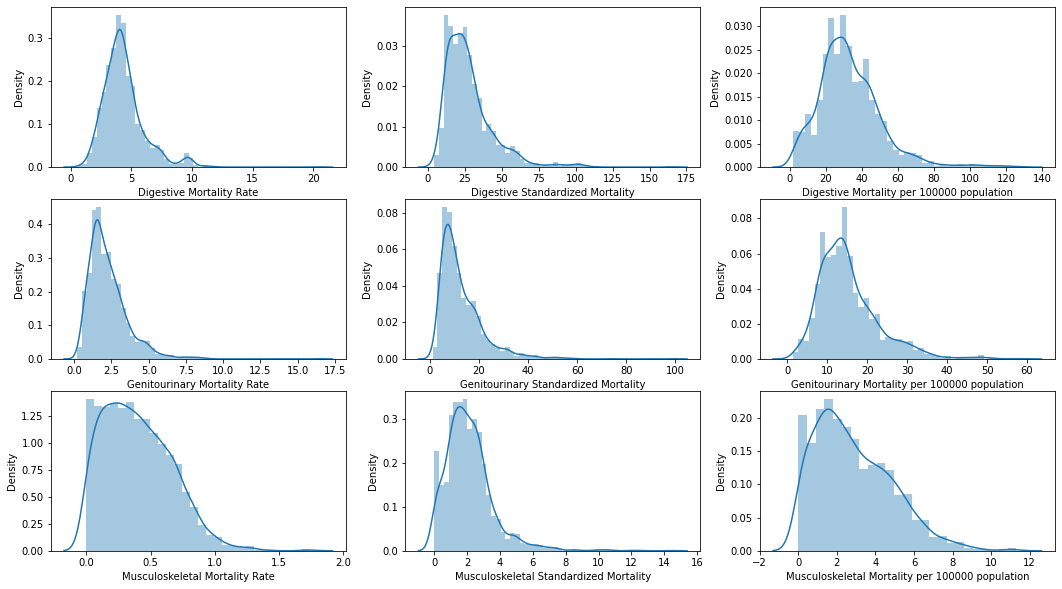

In [ ]:
#create grouped density plots to visualize the distribution of all attributes
# Define the number of rows and columns 
n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (18,10))

for i, column in enumerate(df_merge[[ 'Digestive Mortality Rate', 'Digestive Standardized Mortality','Digestive Mortality per 100000 population',
                    'Genitourinary Mortality Rate', 'Genitourinary Standardized Mortality', 
                    'Genitourinary Mortality per 100000 population', 
                    'Musculoskeletal Mortality Rate', 
                    'Musculoskeletal Standardized Mortality', 
                    'Musculoskeletal Mortality per 100000 population']]):
    sns.distplot(df_merge[column],ax=axes[i//n_cols,i%n_cols])

plt.title('')

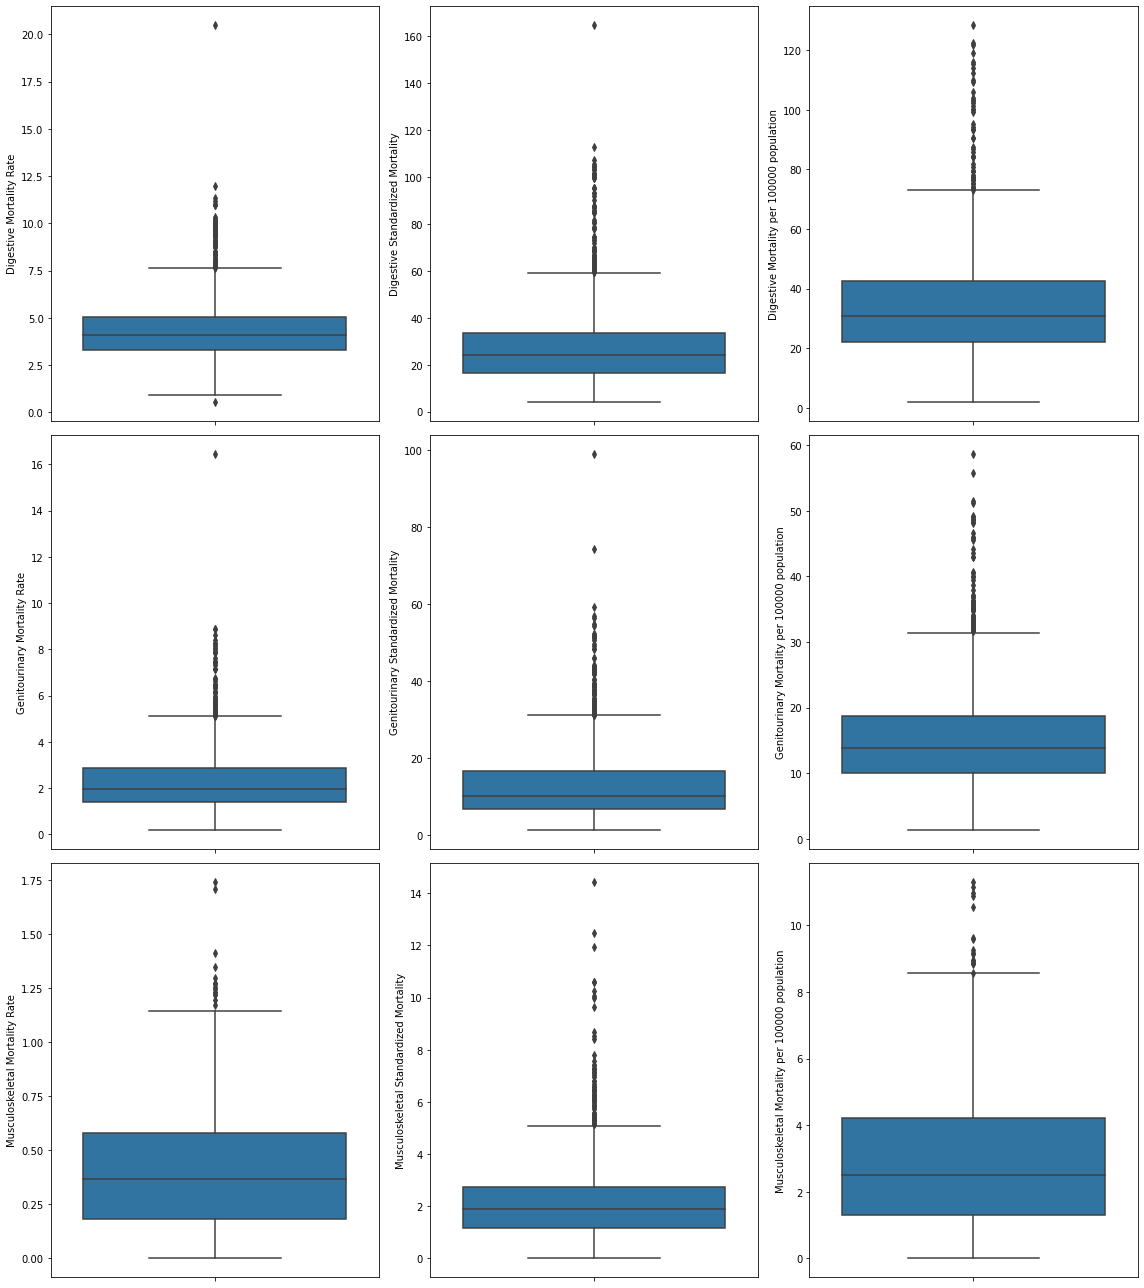

In [ ]:
#create boxplot for each attribute in relation to 'Outcome'
column_list = list(df_merge_numeric.columns)
fig, ax = plt.subplots(3, 3, figsize=(16,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_list):
  sns.boxplot(data=df_merge_numeric, y=col, ax=axes_list[i])

plt.tight_layout()
plt.show()

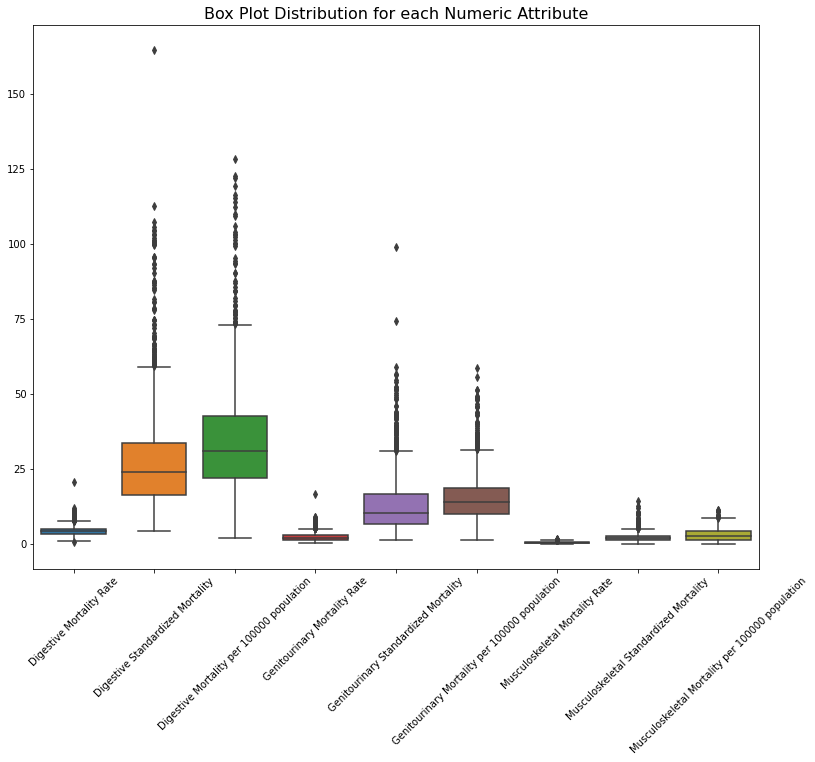

In [ ]:
#boxplot for the cleaned dataset
fig , ax = plt.subplots(figsize = (13,10))
sns.boxplot(data = df_merge_numeric, ax = ax)
plt.title('Box Plot Distribution for each Numeric Attribute', fontsize= 16)
plt.xticks(rotation = 45)
plt.show()


In [ ]:
!pip install pandas plotnine
from plotnine import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


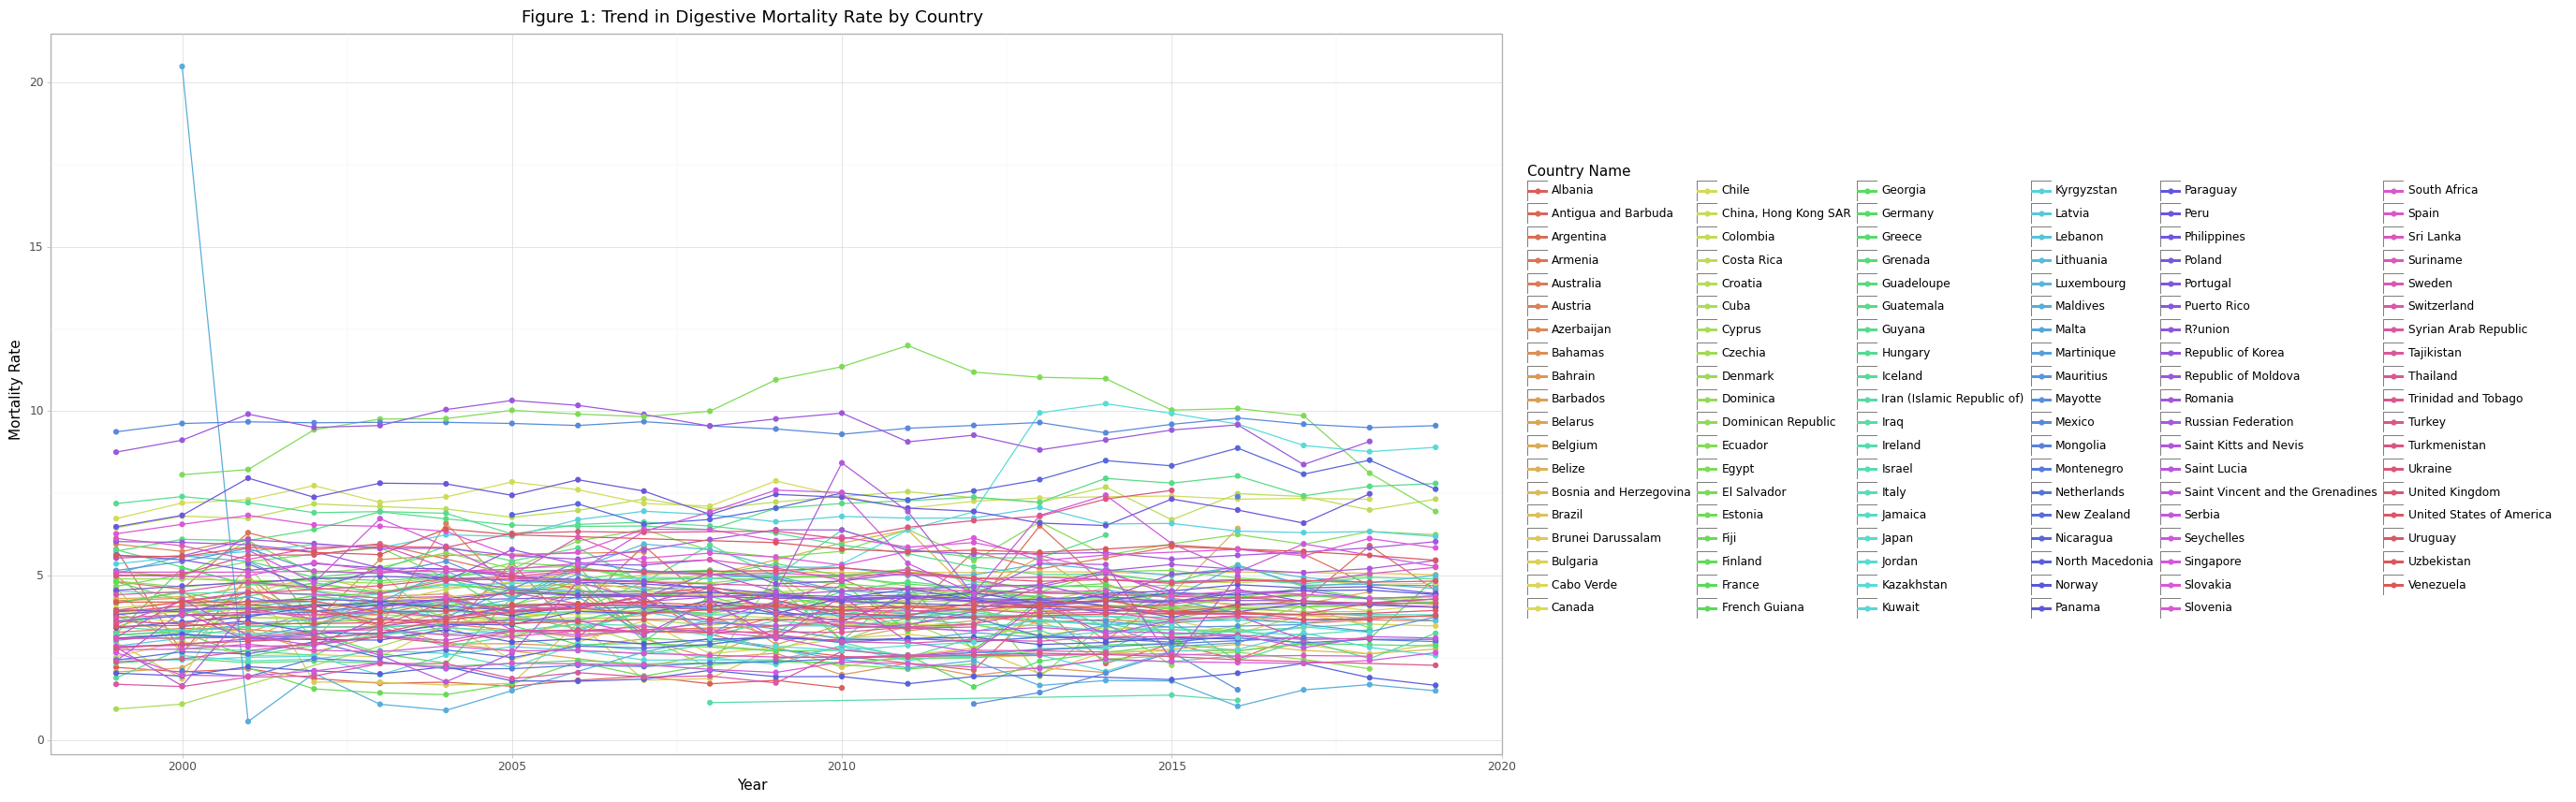

<ggplot: (8775033622809)>

In [ ]:
#Digestive Mortality Rate for all countries 

(ggplot(df_merge)
    + geom_line(aes(x='Year', y='Digestive Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + geom_point(aes(x='Year', y='Digestive Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + theme_light()
    + theme(figure_size = (20,10))
    + labs(y='Mortality Rate', x='Year', title='Figure 1: Trend in Digestive Mortality Rate by Country')
)

In [ ]:
df_merge_sub = df_merge.set_index('Country Name')

In [ ]:
df_merge_sub = df_merge_sub.loc[['Albania', 'Japan', 'Iraq', 'Spain', 'Cuba','Peru','Canada','United States of America']]

In [ ]:
df_merge_sub = df_merge_sub.reset_index()

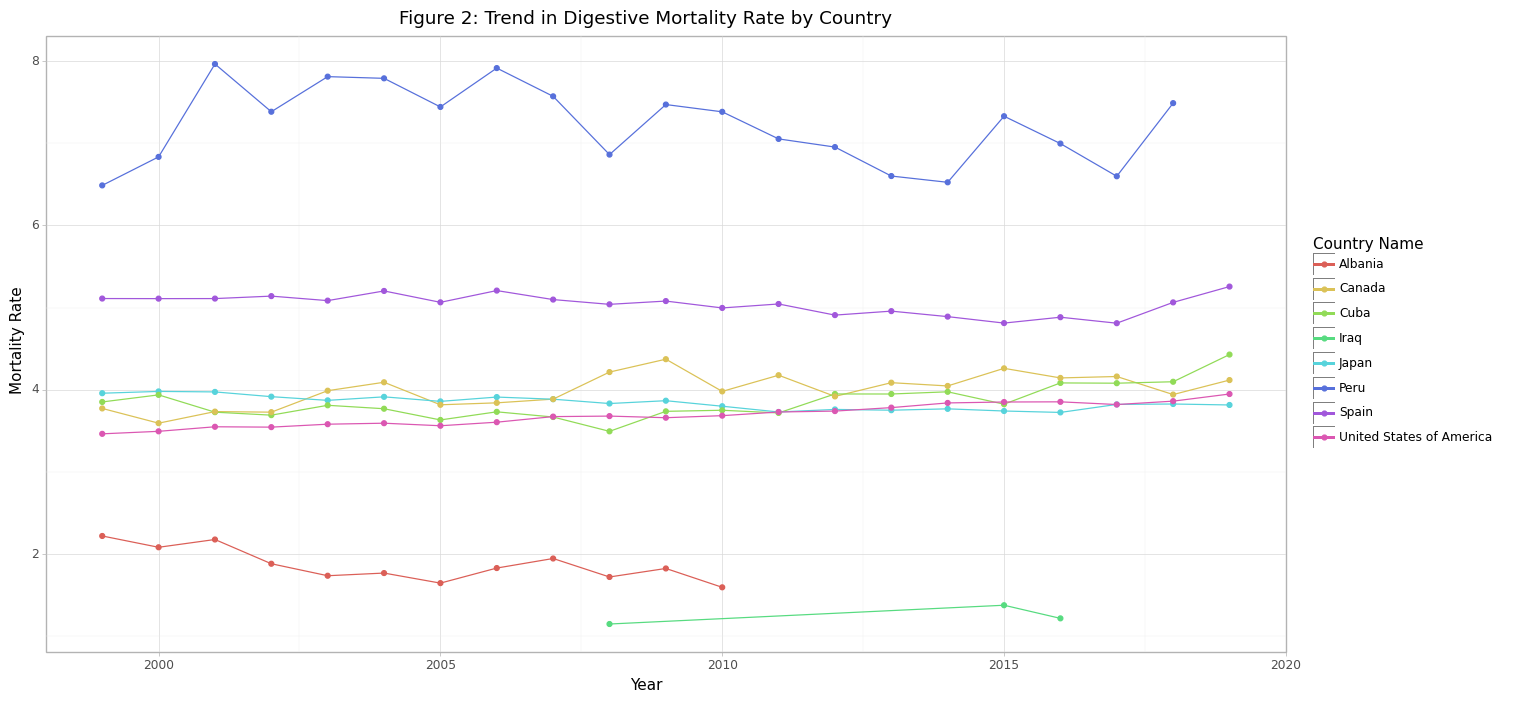

<ggplot: (8775033203081)>

In [ ]:
#Digestive Mortality Rate for selected countries 
(ggplot(df_merge_sub)
    + geom_line(aes(x='Year', y='Digestive Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + geom_point(aes(x='Year', y='Digestive Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + theme_light()
    + theme(figure_size = (16,8))
    + labs(y='Mortality Rate', x='Year', title='Figure 2: Trend in Digestive Mortality Rate by Country')
)

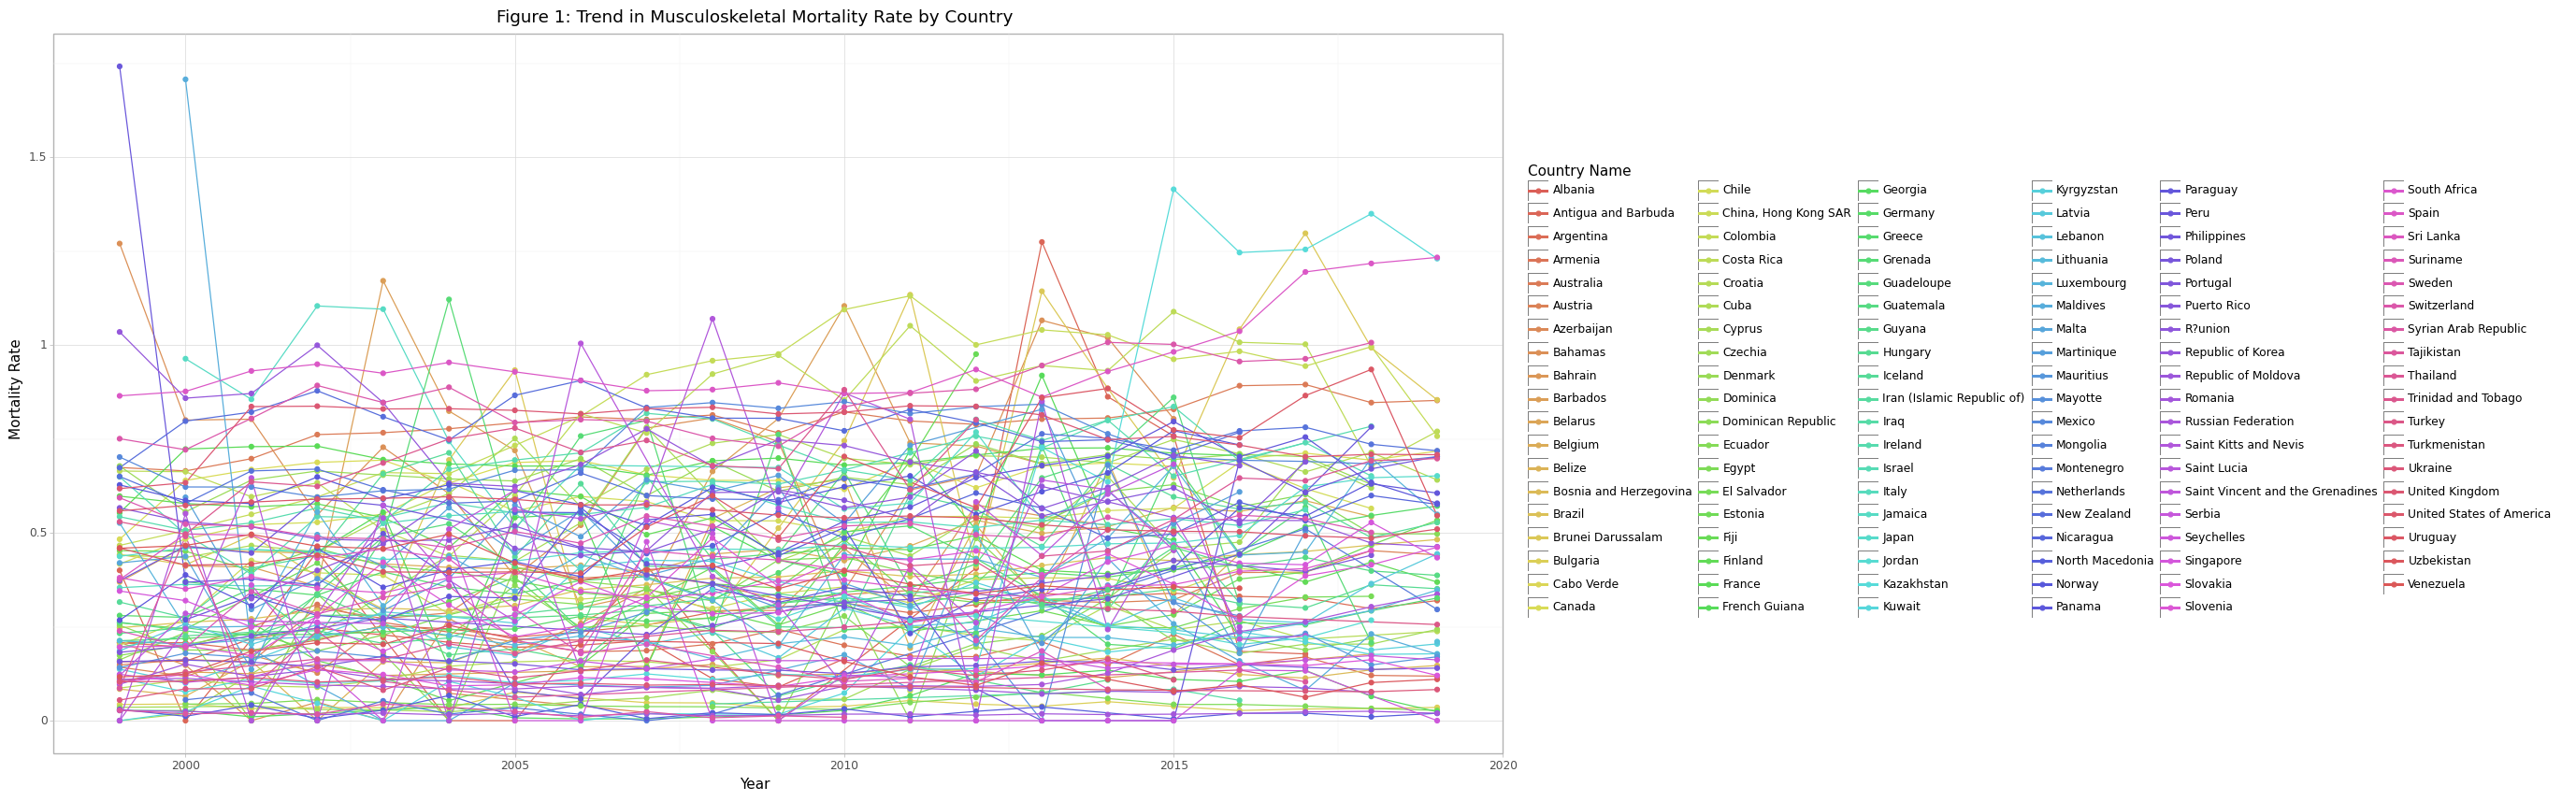

<ggplot: (8775033607129)>

In [ ]:
#Digestive Mortality Rate for all countries 
(ggplot(df_merge)
    + geom_line(aes(x='Year', y='Musculoskeletal Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + geom_point(aes(x='Year', y='Musculoskeletal Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + theme_light()
    + theme(figure_size = (20,10))
    + labs(y='Mortality Rate', x='Year', title='Figure 1: Trend in Musculoskeletal Mortality Rate by Country')
)

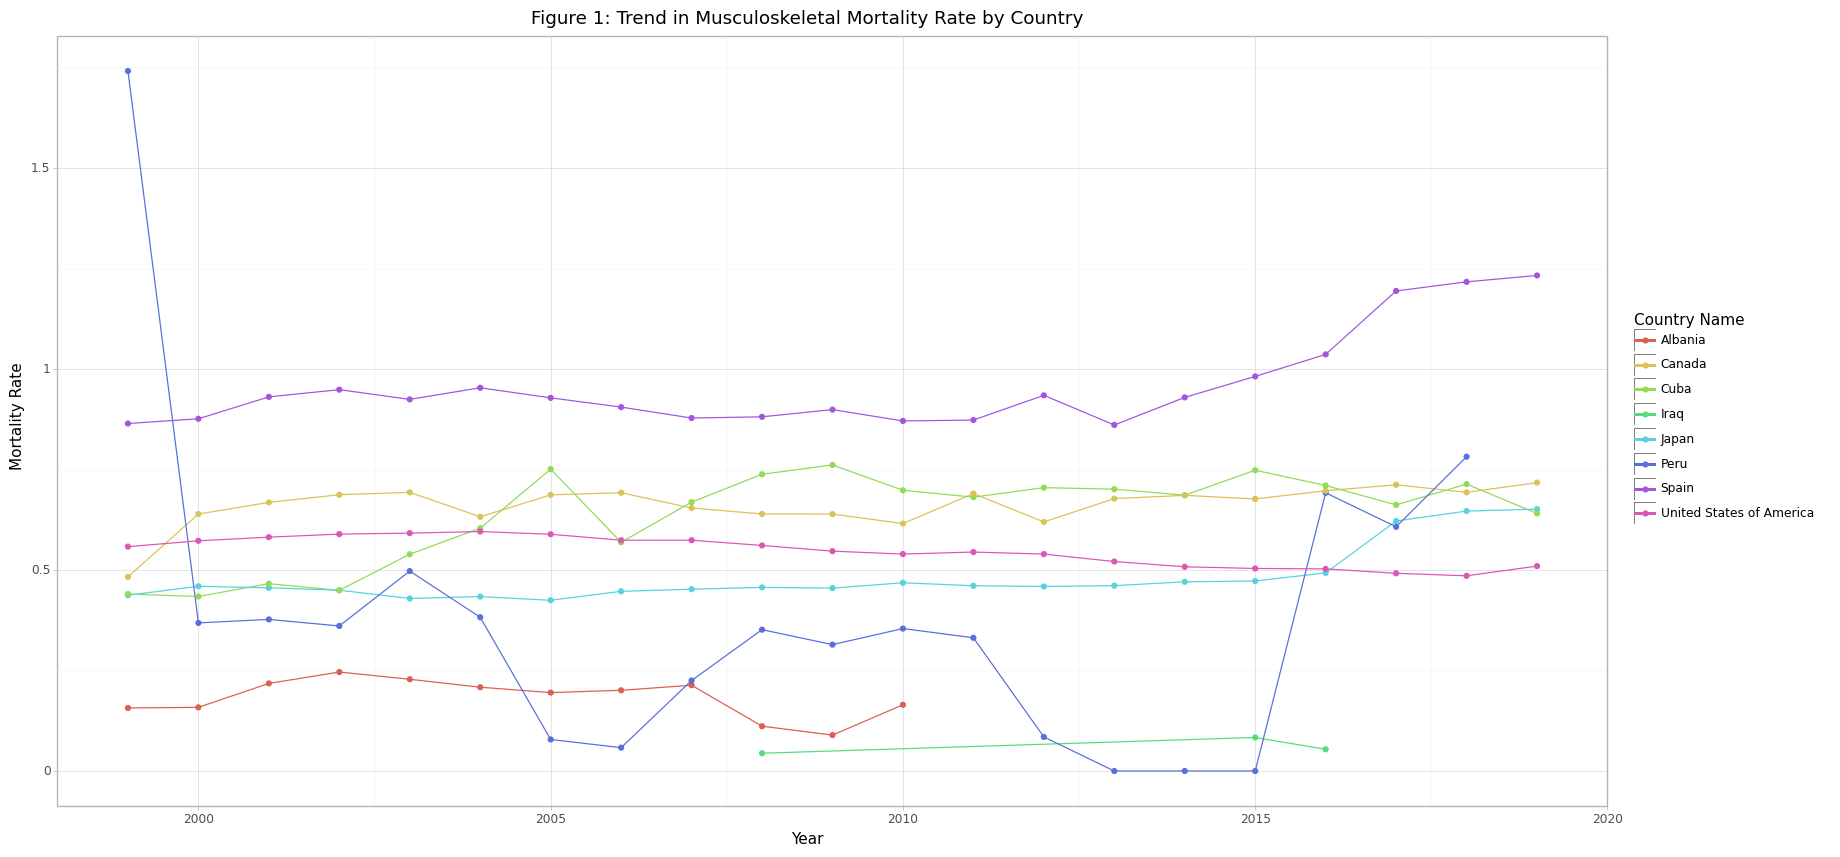

<ggplot: (8775050156909)>

In [ ]:
#Musculoskeletal Mortality Rate for selected countries 
(ggplot(df_merge_sub)
    + geom_line(aes(x='Year', y='Musculoskeletal Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + geom_point(aes(x='Year', y='Musculoskeletal Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + theme_light()
    + theme(figure_size = (20,10))
    + labs(y='Mortality Rate', x='Year', title='Figure 1: Trend in Musculoskeletal Mortality Rate by Country')
)

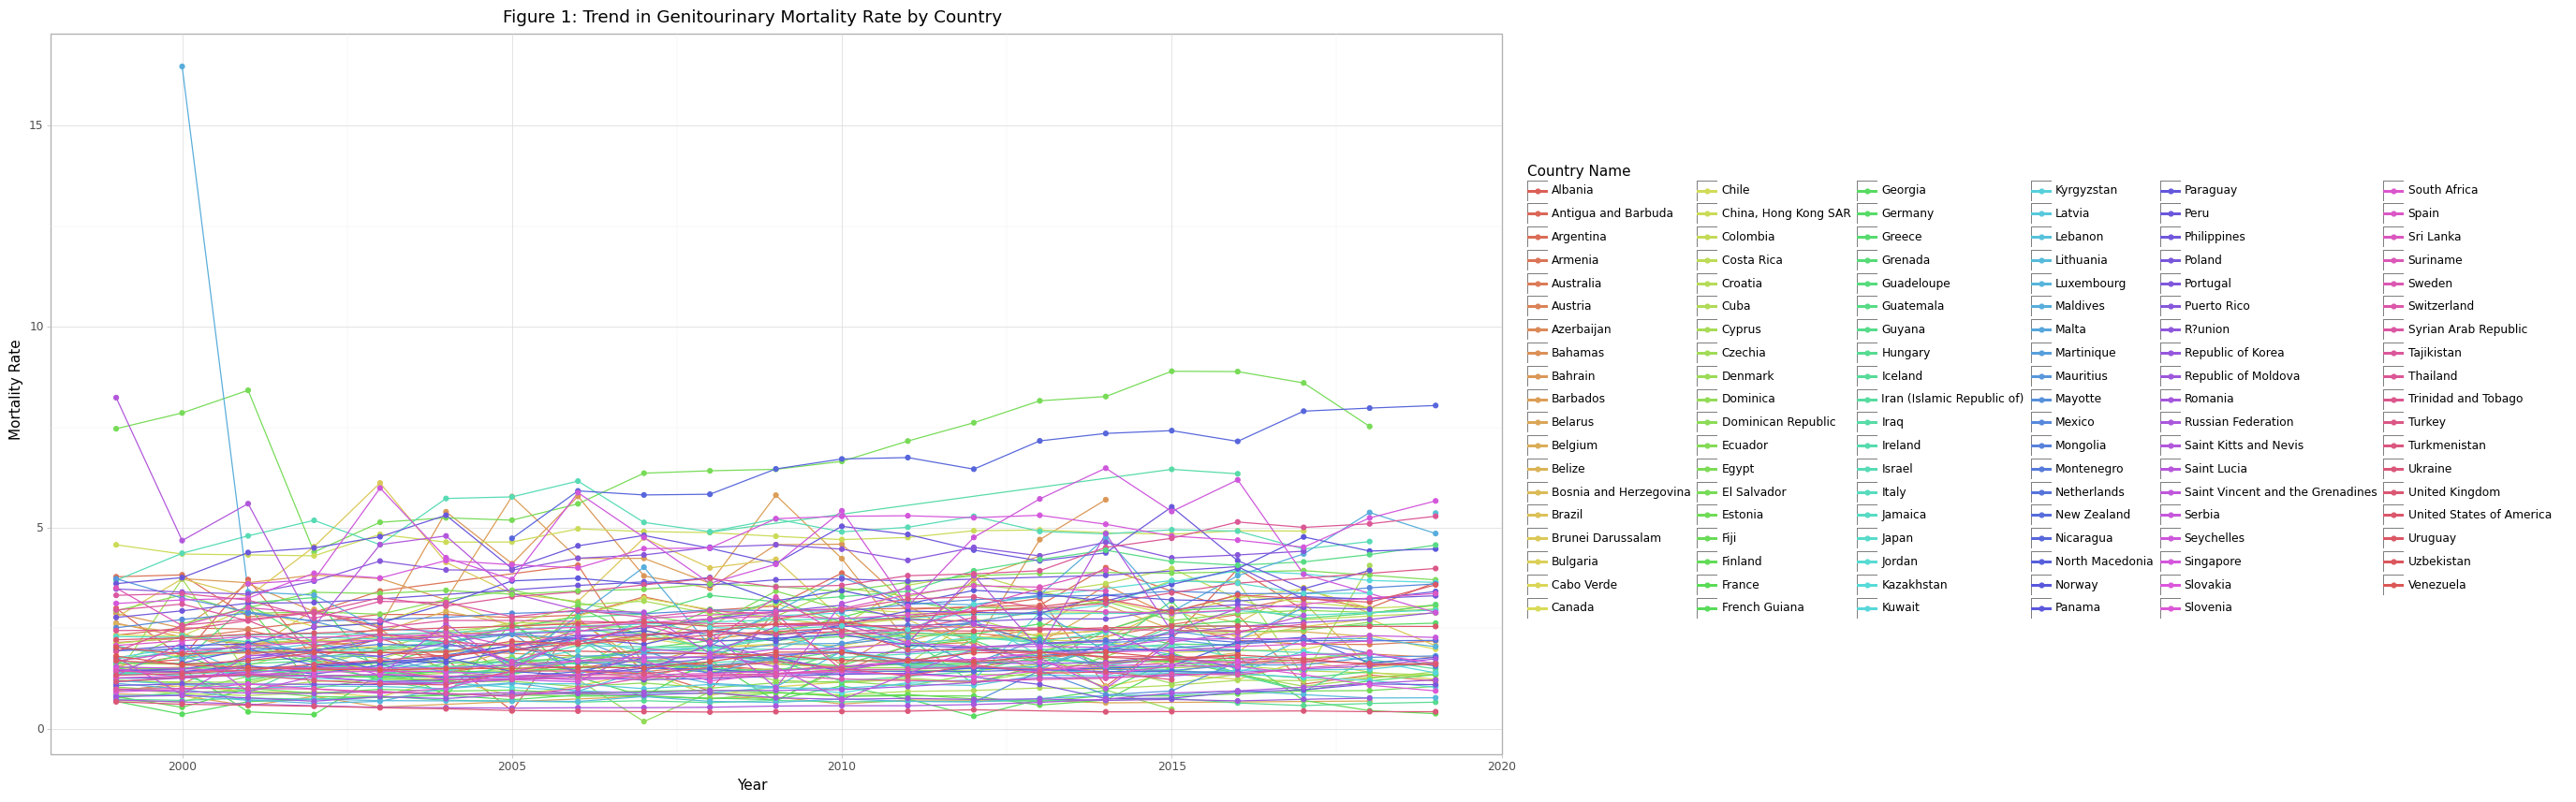

<ggplot: (8775033150665)>

In [ ]:
#Genitourinary Mortality Rate for all countries 
(ggplot(df_merge)
    + geom_line(aes(x='Year', y='Genitourinary Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + geom_point(aes(x='Year', y='Genitourinary Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + theme_light()
    + theme(figure_size = (20,10))
    + labs(y='Mortality Rate', x='Year', title='Figure 1: Trend in Genitourinary Mortality Rate by Country')
)

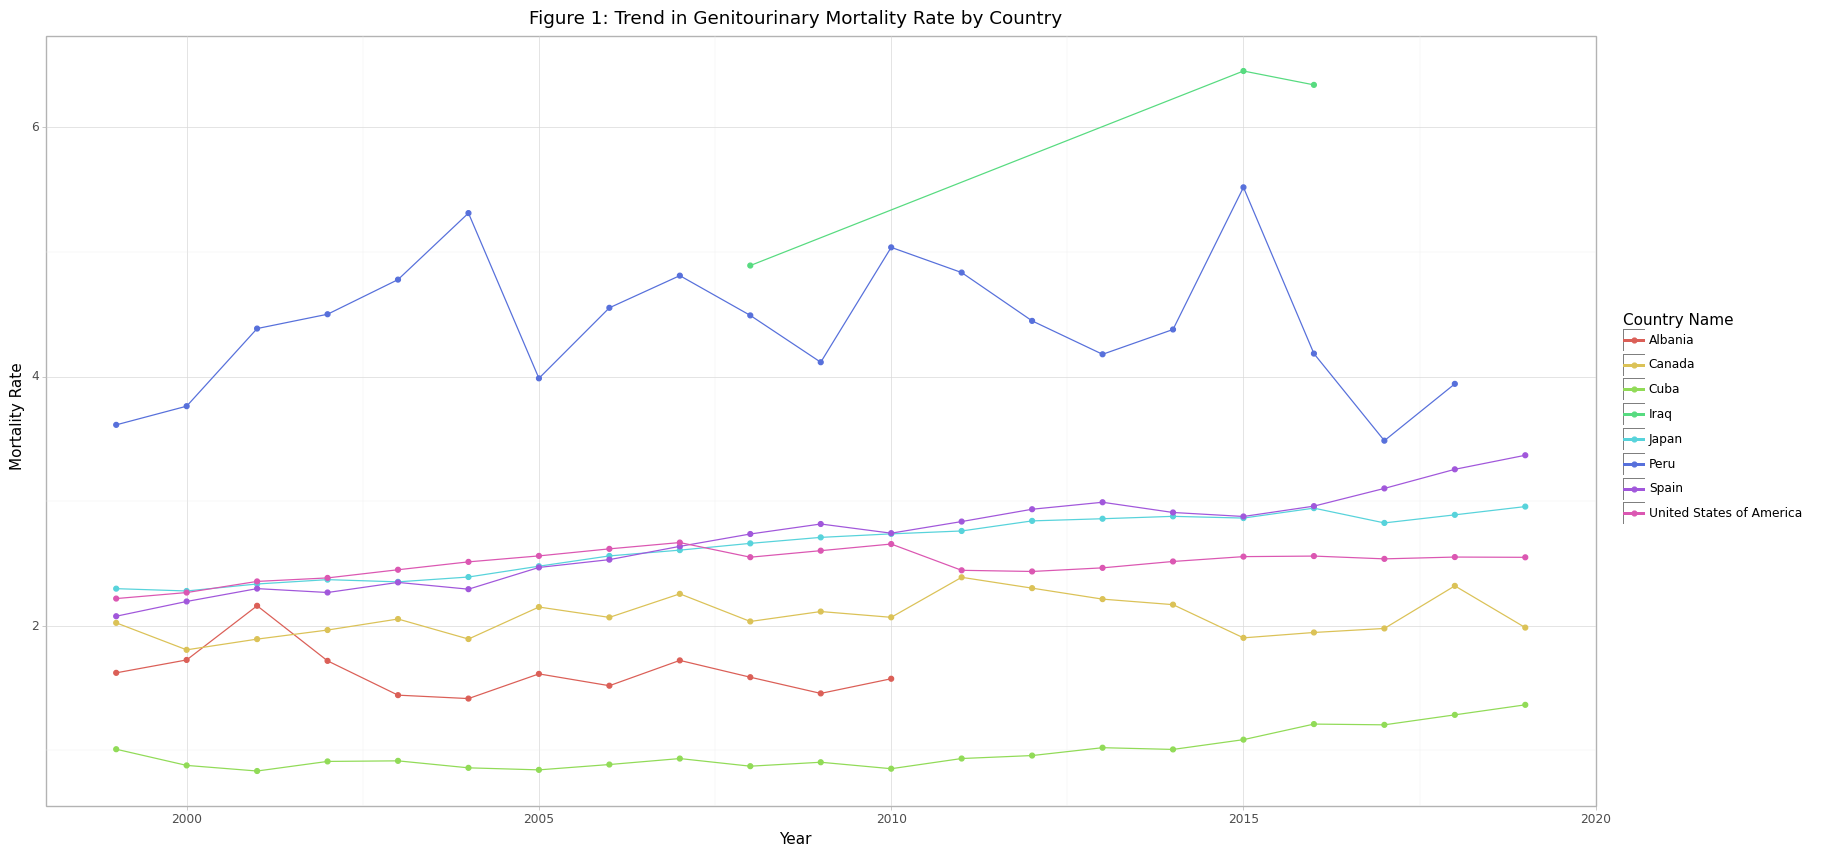

<ggplot: (8775050786065)>

In [ ]:
#Genitourinary Mortality Rate for selected countries 
(ggplot(df_merge_sub)
    + geom_line(aes(x='Year', y='Genitourinary Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + geom_point(aes(x='Year', y='Genitourinary Mortality Rate', color='Country Name', group='Country Name'), stat='identity')
    + theme_light()
    + theme(figure_size = (20,10))
    + labs(y='Mortality Rate', x='Year', title='Figure 1: Trend in Genitourinary Mortality Rate by Country')
)

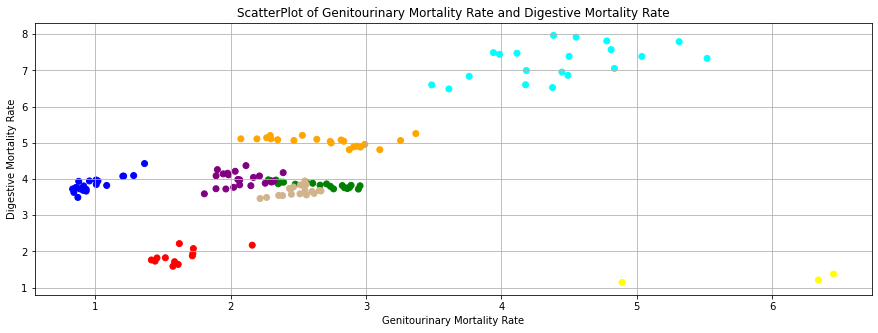

In [ ]:
# Creating scatter plot for continuous features

#ng = np.random.RandomState(0)
#df_merge_sub = df_merge_sub.loc[['Albania', 'Japan', 'Iraq', 'Spain', 'Cuba','Peru','Canada','United States of America']]

#colors = rng.rand(1)
colors = {'Albania': 'red', 
     'Japan': 'green',
     'Iraq':'yellow',
     'Spain': 'orange',
     'Cuba': 'blue',
     'Peru':'cyan',
     'Canada':'purple',
     'United States of America':'tan'} 
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(df_merge_sub['Genitourinary Mortality Rate'], df_merge_sub['Digestive Mortality Rate'], c = df_merge_sub['Country Name'].map(colors), 
           label =['positive','negative'])

ax.set_xlabel('Genitourinary Mortality Rate')
ax.set_ylabel('Digestive Mortality Rate')
ax.set_title('ScatterPlot of Genitourinary Mortality Rate and Digestive Mortality Rate')
plt.grid(True)
plt.show()

## K-Means Clustering

In [ ]:
# Normalization
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df_merge[['Digestive_MR_Norm', 'Digestive_SM_Norm', 'Digestive_M_Norm', 'Genitourinary_MR_Norm', 'Genitourinary_SM_Norm', 'Genitourinary_M_Norm', 'Musculoskeletal_MR_Norm', 'Musculoskeletal_SM_Norm', 'Musculoskeletal_M_Norm']] = scaler.fit_transform(df_merge_numeric)
df_merge.head()

Country Name  Year  Digestive Mortality Rate  \
0      Albania  1999                  2.215686   
1      Albania  2000                  2.077875   
2      Albania  2001                  2.172621   
3      Albania  2002                  1.877154   
4      Albania  2003                  1.731144   

   Digestive Standardized Mortality  \
0                         12.567855   
1                         14.276391   
2                         11.662889   
3                         10.743199   
4                         10.838188   

   Digestive Mortality per 100000 population  Genitourinary Mortality Rate  \
0                                  10.049209                      1.620915   
1                                  10.950546                      1.724453   
2                                  10.719144                      2.159414   
3                                   9.889273                      1.717134   
4                                  10.023321                      1.441692   

   Genitourinary Standardized Mortality  \
0                              9.256352   
1                             11.730877   
2                             11.686393   
3                              9.886593   
4                              9.055065   

   Genitourinary Mortality per 100000 population  \
0                                       7.351633   
1                                       9.087990   
2                                      10.653982   
3                                       9.046253   
4                                       8.347396   

   Musculoskeletal Mortality Rate  Musculoskeletal Standardized Mortality  \
0                        0.156863                                0.944580   
1                        0.158430                                1.092300   
2                        0.217922                                1.174009   
3                        0.246184                                1.421195   
4                        0.228222                                1.437520   

   Musculoskeletal Mortality per 100000 population  Digestive_MR_Norm  \
0                                         0.711448           0.082732   
1                                         0.834939           0.075812   
2                                         1.075172           0.080569   
3                                         1.296954           0.065732   
4                                         1.321402           0.058400   

   Digestive_SM_Norm  Digestive_M_Norm  Genitourinary_MR_Norm  \
0           0.051740          0.062974               0.088167   
1           0.062386          0.070111               0.094527   
2           0.046101          0.068279               0.121244   
3           0.040370          0.061708               0.094077   
4           0.040962          0.062769               0.077158   

   Genitourinary_SM_Norm  Genitourinary_M_Norm  Musculoskeletal_MR_Norm  \
0               0.082373              0.104551                 0.090078   
1               0.107679              0.134832                 0.090978   
2               0.107224              0.162142                 0.125141   
3               0.088818              0.134104                 0.141370   
4               0.080315              0.121916                 0.131055   

   Musculoskeletal_SM_Norm  Musculoskeletal_M_Norm  
0                 0.065482                0.062958  
1                 0.075722                0.073886  
2                 0.081386                0.095145  
3                 0.098522                0.114772  
4                 0.099654                0.116935

### Model 1:
Features: Digiestive, Genitourinary, and Musculoskeletal Percentage of Cause-specific Deaths Out of Total Deaths

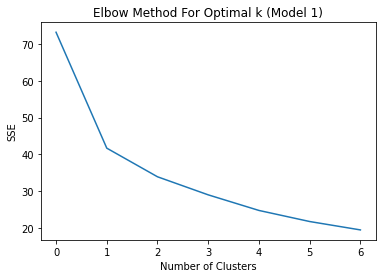

In [ ]:
from os import XATTR_REPLACE

# Determine optimal k
from sklearn.cluster import KMeans
X = df_merge[['Digestive_MR_Norm', 'Genitourinary_MR_Norm', 'Musculoskeletal_MR_Norm']]
sse = []
for num_clusters in list(range(1,8)):
    kmeans = KMeans(n_clusters=num_clusters, init= 'random', n_init= 10, max_iter= 300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k (Model 1)')
plt.show()

In [ ]:
# K-Means

X = df_merge[['Digestive_MR_Norm', 'Genitourinary_MR_Norm', 'Musculoskeletal_MR_Norm']]
k = 4

kmeans = KMeans(n_clusters=k, init= 'random', n_init= 10, max_iter = 300, random_state=2)
clusters = kmeans.fit_predict(X)

# Join data with labels 
labels = pd.DataFrame(clusters)
df_labeled = pd.concat((df_merge,labels),axis=1)
df_labeled = df_labeled.rename({0:'Labels'},axis=1)
df_labeled['Cluster'] = df_labeled['Labels'].map({0:'1st', 1:'2nd', 2:'3rd', 3:'4th'})

df_labeled.head()

Country Name  Year  Digestive Mortality Rate  \
0      Albania  1999                  2.215686   
1      Albania  2000                  2.077875   
2      Albania  2001                  2.172621   
3      Albania  2002                  1.877154   
4      Albania  2003                  1.731144   

   Digestive Standardized Mortality  \
0                         12.567855   
1                         14.276391   
2                         11.662889   
3                         10.743199   
4                         10.838188   

   Digestive Mortality per 100000 population  Genitourinary Mortality Rate  \
0                                  10.049209                      1.620915   
1                                  10.950546                      1.724453   
2                                  10.719144                      2.159414   
3                                   9.889273                      1.717134   
4                                  10.023321                      1.441692   

   Genitourinary Standardized Mortality  \
0                              9.256352   
1                             11.730877   
2                             11.686393   
3                              9.886593   
4                              9.055065   

   Genitourinary Mortality per 100000 population  \
0                                       7.351633   
1                                       9.087990   
2                                      10.653982   
3                                       9.046253   
4                                       8.347396   

   Musculoskeletal Mortality Rate  Musculoskeletal Standardized Mortality  \
0                        0.156863                                0.944580   
1                        0.158430                                1.092300   
2                        0.217922                                1.174009   
3                        0.246184                                1.421195   
4                        0.228222                                1.437520   

   ...  Digestive_SM_Norm  Digestive_M_Norm  Genitourinary_MR_Norm  \
0  ...           0.051740          0.062974               0.088167   
1  ...           0.062386          0.070111               0.094527   
2  ...           0.046101          0.068279               0.121244   
3  ...           0.040370          0.061708               0.094077   
4  ...           0.040962          0.062769               0.077158   

   Genitourinary_SM_Norm  Genitourinary_M_Norm  Musculoskeletal_MR_Norm  \
0               0.082373              0.104551                 0.090078   
1               0.107679              0.134832                 0.090978   
2               0.107224              0.162142                 0.125141   
3               0.088818              0.134104                 0.141370   
4               0.080315              0.121916                 0.131055   

   Musculoskeletal_SM_Norm  Musculoskeletal_M_Norm  Labels  Cluster  
0                 0.065482                0.062958       3      4th  
1                 0.075722                0.073886       3      4th  
2                 0.081386                0.095145       3      4th  
3                 0.098522                0.114772       3      4th  
4                 0.099654                0.116935       3      4th  

[5 rows x 22 columns]

In [ ]:
# Find the lowest SSE value
kmeans.inertia_

28.959489445562497

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[0.20583013, 0.13906672, 0.45308286],
       [0.22785969, 0.26657136, 0.17687056],
       [0.1742406 , 0.11104811, 0.26789177],
       [0.1827204 , 0.0847557 , 0.08520105]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

8

In [ ]:
# Clusters summary age standardized
df_labeled_tmp = df_labeled
cluster_sum = df_labeled_tmp.rename(columns = {'Labels':'Total'}, inplace = True)
cluster_sum = df_labeled_tmp.sort_values(['Cluster']).groupby('Cluster').agg(
    {
        'Total':'count', 
        'Digestive Mortality Rate': 'mean',
        'Genitourinary Mortality Rate': 'mean',
        'Musculoskeletal Mortality Rate': 'mean',
    }
).reset_index()

cluster_sum

Cluster  Total  Digestive Mortality Rate  Genitourinary Mortality Rate  \
0     1st    412                  4.667031                      2.449581   
1     2nd    260                  5.105722                      4.525400   
2     3rd    592                  4.037965                      1.993429   
3     4th    714                  4.206829                      1.565380   

   Musculoskeletal Mortality Rate  
0                        0.789004  
1                        0.308004  
2                        0.466510  
3                        0.148370

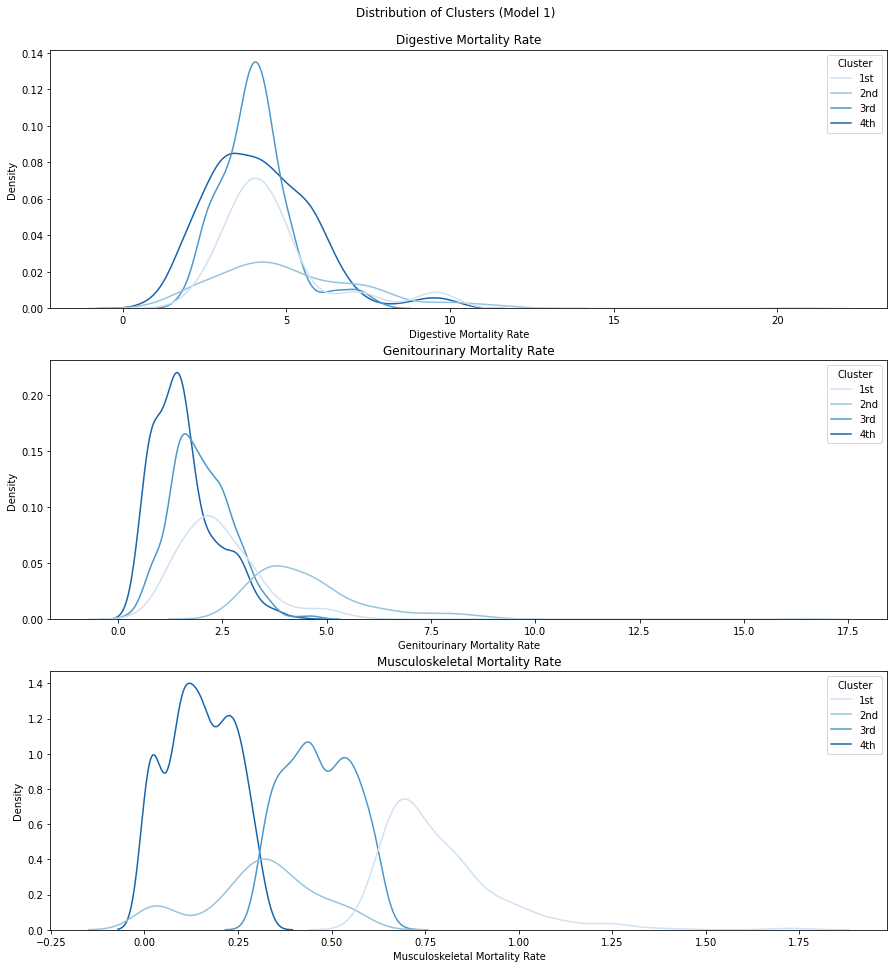

In [ ]:
# Distribution of Clusters 1st
fig, ax = plt.subplots(3, figsize=(15,15))
fig.suptitle('Distribution of Clusters (Model 1)')
fig.subplots_adjust(top=0.94)

sns.kdeplot(x='Digestive Mortality Rate', hue='Cluster', hue_order = ['1st', '2nd', '3rd', '4th'], data=df_labeled, ax=ax[0], palette='Blues')
ax[0].set_title('Digestive Mortality Rate')
sns.kdeplot(x='Genitourinary Mortality Rate', hue='Cluster', hue_order = ['1st', '2nd', '3rd', '4th'], data=df_labeled, ax=ax[1], palette='Blues')
ax[1].set_title('Genitourinary Mortality Rate')
sns.kdeplot(x='Musculoskeletal Mortality Rate', hue='Cluster', hue_order = ['1st', '2nd', '3rd', '4th'], data=df_labeled, ax=ax[2], palette='Blues')
ax[2].set_title('Musculoskeletal Mortality Rate')

plt.show()

### Model 2: 
Features: Digestive, Genitourinary, and Musculoskeletal Age-standardized Death Rate per 100,000 Standard Population

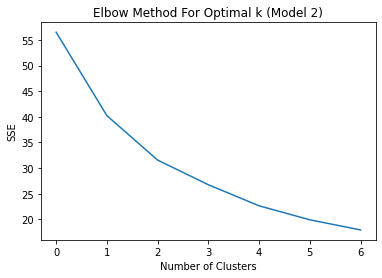

In [ ]:
from os import XATTR_REPLACE

# Determine optimal k
from sklearn.cluster import KMeans
X = df_merge[['Digestive_SM_Norm', 'Genitourinary_SM_Norm', 'Musculoskeletal_SM_Norm']]
sse = []
for num_clusters in list(range(1,8)):
    kmeans = KMeans(n_clusters=num_clusters, init= 'random', n_init= 10, max_iter= 300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k (Model 2)')
plt.show()

According to the Elbow graph we determine the clusters number as #4.

In [ ]:
# K-Means

X = df_merge[['Digestive_SM_Norm', 'Genitourinary_SM_Norm', 'Musculoskeletal_SM_Norm']]
k = 4

kmeans = KMeans(n_clusters=k, init= 'random', n_init= 10, max_iter = 300, random_state=2)
clusters = kmeans.fit_predict(X)

# Join data with labels 
labels = pd.DataFrame(clusters)
df_labeled = pd.concat((df_merge,labels),axis=1)
df_labeled = df_labeled.rename({0:'Labels'},axis=1)
df_labeled['Cluster'] = df_labeled['Labels'].map({0:'1st', 1:'2nd', 2:'3rd', 3:'4th'})

df_labeled.head()

Country Name  Year  Digestive Mortality Rate  \
0      Albania  1999                  2.215686   
1      Albania  2000                  2.077875   
2      Albania  2001                  2.172621   
3      Albania  2002                  1.877154   
4      Albania  2003                  1.731144   

   Digestive Standardized Mortality  \
0                         12.567855   
1                         14.276391   
2                         11.662889   
3                         10.743199   
4                         10.838188   

   Digestive Mortality per 100000 population  Genitourinary Mortality Rate  \
0                                  10.049209                      1.620915   
1                                  10.950546                      1.724453   
2                                  10.719144                      2.159414   
3                                   9.889273                      1.717134   
4                                  10.023321                      1.441692   

   Genitourinary Standardized Mortality  \
0                              9.256352   
1                             11.730877   
2                             11.686393   
3                              9.886593   
4                              9.055065   

   Genitourinary Mortality per 100000 population  \
0                                       7.351633   
1                                       9.087990   
2                                      10.653982   
3                                       9.046253   
4                                       8.347396   

   Musculoskeletal Mortality Rate  Musculoskeletal Standardized Mortality  \
0                        0.156863                                0.944580   
1                        0.158430                                1.092300   
2                        0.217922                                1.174009   
3                        0.246184                                1.421195   
4                        0.228222                                1.437520   

   ...  Digestive_SM_Norm  Digestive_M_Norm  Genitourinary_MR_Norm  \
0  ...           0.051740          0.062974               0.088167   
1  ...           0.062386          0.070111               0.094527   
2  ...           0.046101          0.068279               0.121244   
3  ...           0.040370          0.061708               0.094077   
4  ...           0.040962          0.062769               0.077158   

   Genitourinary_SM_Norm  Genitourinary_M_Norm  Musculoskeletal_MR_Norm  \
0               0.082373              0.104551                 0.090078   
1               0.107679              0.134832                 0.090978   
2               0.107224              0.162142                 0.125141   
3               0.088818              0.134104                 0.141370   
4               0.080315              0.121916                 0.131055   

   Musculoskeletal_SM_Norm  Musculoskeletal_M_Norm  Labels  Cluster  
0                 0.065482                0.062958       0      1st  
1                 0.075722                0.073886       0      1st  
2                 0.081386                0.095145       0      1st  
3                 0.098522                0.114772       0      1st  
4                 0.099654                0.116935       0      1st  

[5 rows x 22 columns]

In [ ]:
# model performance
from sklearn.metrics import silhouette_score
score  = silhouette_score (X, clusters)
score

0.37261950679574934

In [ ]:
# Find the lowest SSE value
kmeans.inertia_

26.766194397465515

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[0.09934236, 0.09061704, 0.13013763],
       [0.18379642, 0.18473716, 0.35290246],
       [0.28999706, 0.37008931, 0.12420246],
       [0.27424257, 0.10526499, 0.09150858]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

22

In [ ]:
# Clusters summary

cluster_sum = df_labeled.rename(columns = {'Labels':'Total'}, inplace = True)
cluster_sum = df_labeled.sort_values(['Cluster']).groupby('Cluster').agg(
    {
        'Total':'count', 
        'Digestive Standardized Mortality': 'mean',
        'Genitourinary Standardized Mortality': 'mean',
        'Musculoskeletal Standardized Mortality': 'mean',
    }
).reset_index()

cluster_sum

Cluster  Total  Digestive Standardized Mortality  \
0     1st   1354                         20.207451   
1     2nd    205                         33.761159   
2     3rd    111                         50.804890   
3     4th    308                         48.276513   

   Genitourinary Standardized Mortality  \
0                             10.062499   
1                             19.266069   
2                             37.390796   
3                             11.494854   

   Musculoskeletal Standardized Mortality  
0                                1.877252  
1                                5.090663  
2                                1.791636  
3                                1.320023

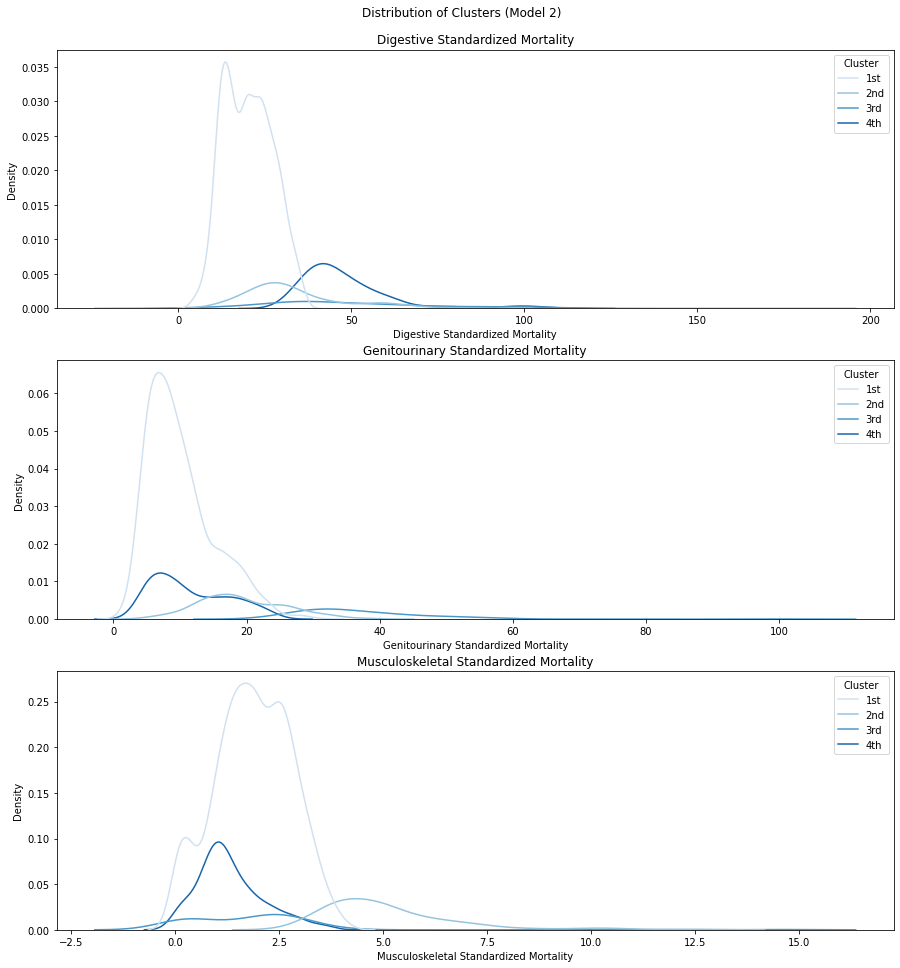

In [ ]:
# Distribution of Clusters 1st
fig, ax = plt.subplots(3, figsize=(15,15))
fig.suptitle('Distribution of Clusters (Model 2)')
fig.subplots_adjust(top=0.94)

sns.kdeplot(x='Digestive Standardized Mortality', hue='Cluster', hue_order = ['1st', '2nd', '3rd', '4th'], data=df_labeled, ax=ax[0], palette='Blues')
ax[0].set_title('Digestive Standardized Mortality')
sns.kdeplot(x='Genitourinary Standardized Mortality', hue='Cluster', hue_order = ['1st', '2nd', '3rd', '4th'], data=df_labeled, ax=ax[1], palette='Blues')
ax[1].set_title('Genitourinary Standardized Mortality')
sns.kdeplot(x='Musculoskeletal Standardized Mortality', hue='Cluster', hue_order = ['1st', '2nd', '3rd', '4th'], data=df_labeled, ax=ax[2], palette='Blues')
ax[2].set_title('Musculoskeletal Standardized Mortality')

plt.show()

In [ ]:
# Countries in 1st cluster
cluster_1 = df_labeled[df_labeled['Cluster']=='1st']
cluster_1['Country Name'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cabo Verde', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Estonia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guadeloupe',
       'China, Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Republic of)', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Republic of Korea', 'Kuwait', 'Latvia',
       'Lebanon', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta',
       'Martinique', 'Mauritius', 'Mayotte', 'Montenegro', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Panama', 'Paraguay',
       'Peru', 'Poland', 'Portugal', 'Puerto Rico', '

In [ ]:
len(cluster_1['Country Name'].unique())

94

In [ ]:
# Countries in 2nd cluster
cluster_2 = df_labeled[df_labeled['Cluster']=='2nd']
cluster_2['Country Name'].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize',
       'Brunei Darussalam', 'Colombia', 'Costa Rica', 'Denmark', 'Fiji',
       'French Guiana', 'Grenada', 'Guyana', 'Jamaica', 'Kazakhstan',
       'Republic of Korea', 'Kyrgyzstan', 'Mexico', 'Paraguay', 'Peru',
       'Philippines', 'Puerto Rico', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Seychelles', 'South Africa',
       'Sri Lanka', 'Suriname', 'Tajikistan', 'Thailand',
       'Trinidad and Tobago', 'Uruguay'], dtype=object)

In [ ]:
len(cluster_2['Country Name'].unique())

31

In [ ]:
# Countries in 3rd cluster
cluster_3 = df_labeled[df_labeled['Cluster']=='3rd']
cluster_3['Country Name'].unique()

array(['Bahrain', 'Belize', 'Brunei Darussalam', 'Egypt', 'El Salvador',
       'Fiji', 'Grenada', 'Guatemala', 'Iraq', 'Maldives', 'Mauritius',
       'Nicaragua', 'Peru', 'Philippines', 'Seychelles', 'Suriname'],
      dtype=object)

In [ ]:
len(cluster_3['Country Name'].unique())

16

In [ ]:
# Countries in 4th cluster
cluster_4 = df_labeled[df_labeled['Cluster']=='4th']
cluster_4['Country Name'].unique()

array(['Antigua and Barbuda', 'Armenia', 'Argentina', 'Azerbaijan',
       'Austria', 'Bahrain', 'Belarus', 'Belize', 'Chile', 'Croatia',
       'Ecuador', 'Egypt', 'Estonia', 'Grenada', 'Guatemala', 'Guyana',
       'Hungary', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Mauritius', 'Mexico', 'Republic of Moldova', 'Mongolia', 'Peru',
       'Romania', 'Russian Federation',
       'Saint Vincent and the Grenadines', 'Seychelles', 'Slovakia',
       'Slovenia', 'Suriname', 'Tajikistan', 'Turkmenistan', 'Ukraine',
       'Uzbekistan'], dtype=object)

In [ ]:
len(cluster_4['Country Name'].unique())

37

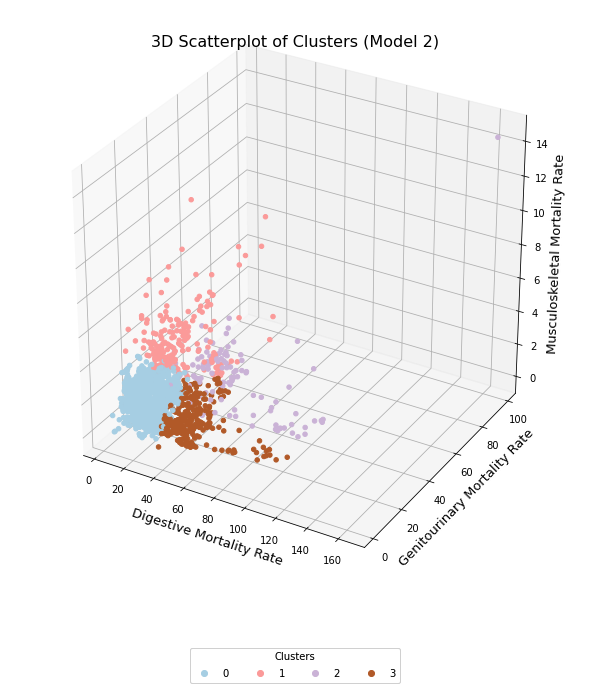

In [ ]:
# 3D scatterplot of clusters 1st

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))

ax = Axes3D(fig)

x = df_labeled['Digestive Standardized Mortality']
y = df_labeled['Genitourinary Standardized Mortality']
z = df_labeled['Musculoskeletal Standardized Mortality']
c = df_labeled['Total']

g = ax.scatter(x, y, z, c=clusters, marker='o', depthshade=False, cmap='Paired')
ax.set_title('3D Scatterplot of Clusters (Model 2)', fontsize = 16)
ax.set_xlabel('Digestive Mortality Rate',fontsize = 13)
ax.set_ylabel('Genitourinary Mortality Rate', fontsize = 13)
ax.set_zlabel('Musculoskeletal Mortality Rate', fontsize = 13)

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="Clusters", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

plt.show()

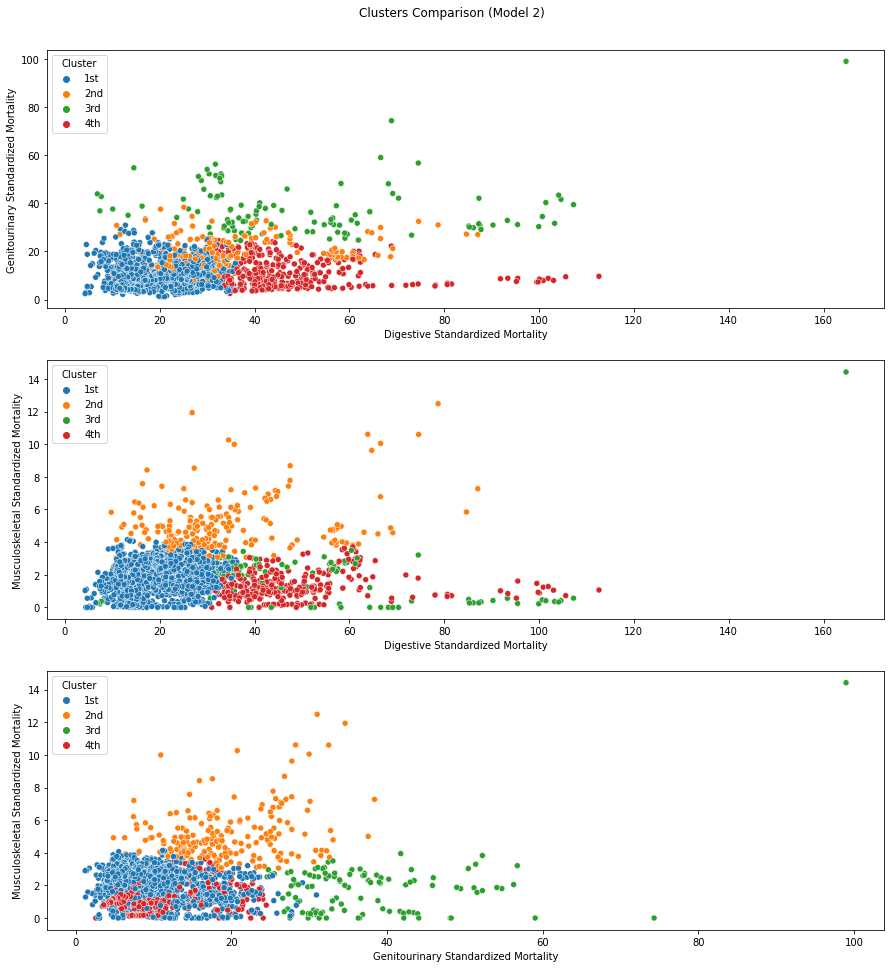

In [ ]:
# Visualization of the clusters
fig, ax = plt.subplots(3, figsize=(15,15))
fig.suptitle('Clusters Comparison (Model 2)')
fig.subplots_adjust(top=0.94)

sns.scatterplot(x = df_labeled['Digestive Standardized Mortality'], 
            y = df_labeled['Genitourinary Standardized Mortality'], 
            hue=df_labeled['Cluster'], hue_order = ['1st', '2nd', '3rd', '4th'], 
            ax = ax[0], data=df_labeled)

sns.scatterplot(x = df_labeled['Digestive Standardized Mortality'], 
            y = df_labeled['Musculoskeletal Standardized Mortality'], 
            hue=df_labeled['Cluster'], hue_order = ['1st', '2nd', '3rd', '4th'], 
            ax = ax[1], data=df_labeled)

sns.scatterplot(x = df_labeled['Genitourinary Standardized Mortality'], 
            y = df_labeled['Musculoskeletal Standardized Mortality'], 
            hue=df_labeled['Cluster'], hue_order = ['1st', '2nd', '3rd', '4th'], 
            ax = ax[2], data=df_labeled)

plt.show()

### Model 3: 
Features: Digestive, Genitourinary Age-standardized Death Rate per 100,000 Standard Population

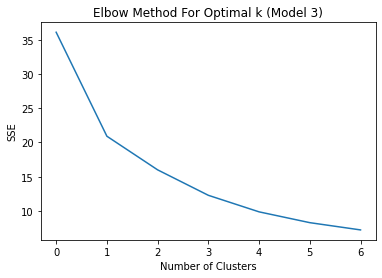

In [ ]:
from os import XATTR_REPLACE

# Determine optimal k
from sklearn.cluster import KMeans
X = df_merge[['Digestive_SM_Norm', 'Genitourinary_SM_Norm']]
sse = []
for num_clusters in list(range(1,8)):
    kmeans = KMeans(n_clusters=num_clusters, init= 'random', n_init= 10, max_iter= 300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k (Model 3)')
plt.show()

In [ ]:
# K-Means

X = df_merge[['Digestive_SM_Norm', 'Genitourinary_SM_Norm']]
k = 4

kmeans = KMeans(n_clusters=k, init= 'random', n_init= 10, max_iter = 300, random_state=2)
clusters = kmeans.fit_predict(X)

# Join data with labels 
labels = pd.DataFrame(clusters)
df_labeled = pd.concat((df_merge,labels),axis=1)
df_labeled = df_labeled.rename({0:'Labels'},axis=1)
df_labeled['Cluster'] = df_labeled['Labels'].map({0:'1st', 1:'2nd', 2:'3rd', 3:'4th'})

df_labeled.head()

Country Name  Year  Digestive Mortality Rate  \
0      Albania  1999                  2.215686   
1      Albania  2000                  2.077875   
2      Albania  2001                  2.172621   
3      Albania  2002                  1.877154   
4      Albania  2003                  1.731144   

   Digestive Standardized Mortality  \
0                         12.567855   
1                         14.276391   
2                         11.662889   
3                         10.743199   
4                         10.838188   

   Digestive Mortality per 100000 population  Genitourinary Mortality Rate  \
0                                  10.049209                      1.620915   
1                                  10.950546                      1.724453   
2                                  10.719144                      2.159414   
3                                   9.889273                      1.717134   
4                                  10.023321                      1.441692   

   Genitourinary Standardized Mortality  \
0                              9.256352   
1                             11.730877   
2                             11.686393   
3                              9.886593   
4                              9.055065   

   Genitourinary Mortality per 100000 population  \
0                                       7.351633   
1                                       9.087990   
2                                      10.653982   
3                                       9.046253   
4                                       8.347396   

   Musculoskeletal Mortality Rate  Musculoskeletal Standardized Mortality  \
0                        0.156863                                0.944580   
1                        0.158430                                1.092300   
2                        0.217922                                1.174009   
3                        0.246184                                1.421195   
4                        0.228222                                1.437520   

   ...  Digestive_SM_Norm  Digestive_M_Norm  Genitourinary_MR_Norm  \
0  ...           0.051740          0.062974               0.088167   
1  ...           0.062386          0.070111               0.094527   
2  ...           0.046101          0.068279               0.121244   
3  ...           0.040370          0.061708               0.094077   
4  ...           0.040962          0.062769               0.077158   

   Genitourinary_SM_Norm  Genitourinary_M_Norm  Musculoskeletal_MR_Norm  \
0               0.082373              0.104551                 0.090078   
1               0.107679              0.134832                 0.090978   
2               0.107224              0.162142                 0.125141   
3               0.088818              0.134104                 0.141370   
4               0.080315              0.121916                 0.131055   

   Musculoskeletal_SM_Norm  Musculoskeletal_M_Norm  Labels  Cluster  
0                 0.065482                0.062958       1      2nd  
1                 0.075722                0.073886       1      2nd  
2                 0.081386                0.095145       1      2nd  
3                 0.098522                0.114772       1      2nd  
4                 0.099654                0.116935       1      2nd  

[5 rows x 22 columns]

In [ ]:
# model performance
from sklearn.metrics import silhouette_score
score  = silhouette_score (X, clusters)
score

0.41697810664508933

In [ ]:
# Find the lowest SSE value
kmeans.inertia_

12.300062719010871

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[0.29704692, 0.10166061],
       [0.10061316, 0.07003085],
       [0.12606289, 0.18653613],
       [0.32043668, 0.3633936 ]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

8

In [ ]:
# Clusters summary

cluster_sum = df_labeled.rename(columns = {'Labels':'Total'}, inplace = True)
cluster_sum = df_labeled.sort_values(['Cluster']).groupby('Cluster').agg(
    {
        'Total':'count', 
        'Digestive Standardized Mortality': 'mean',
        'Genitourinary Standardized Mortality': 'mean',
    }
).reset_index()

cluster_sum

Cluster  Total  Digestive Standardized Mortality  \
0     1st    271                         51.936296   
1     2nd   1133                         20.412627   
2     3rd    461                         24.501559   
3     4th    113                         55.690029   

   Genitourinary Standardized Mortality  
0                             11.142399  
1                              8.054571  
2                             19.454162  
3                             36.736053

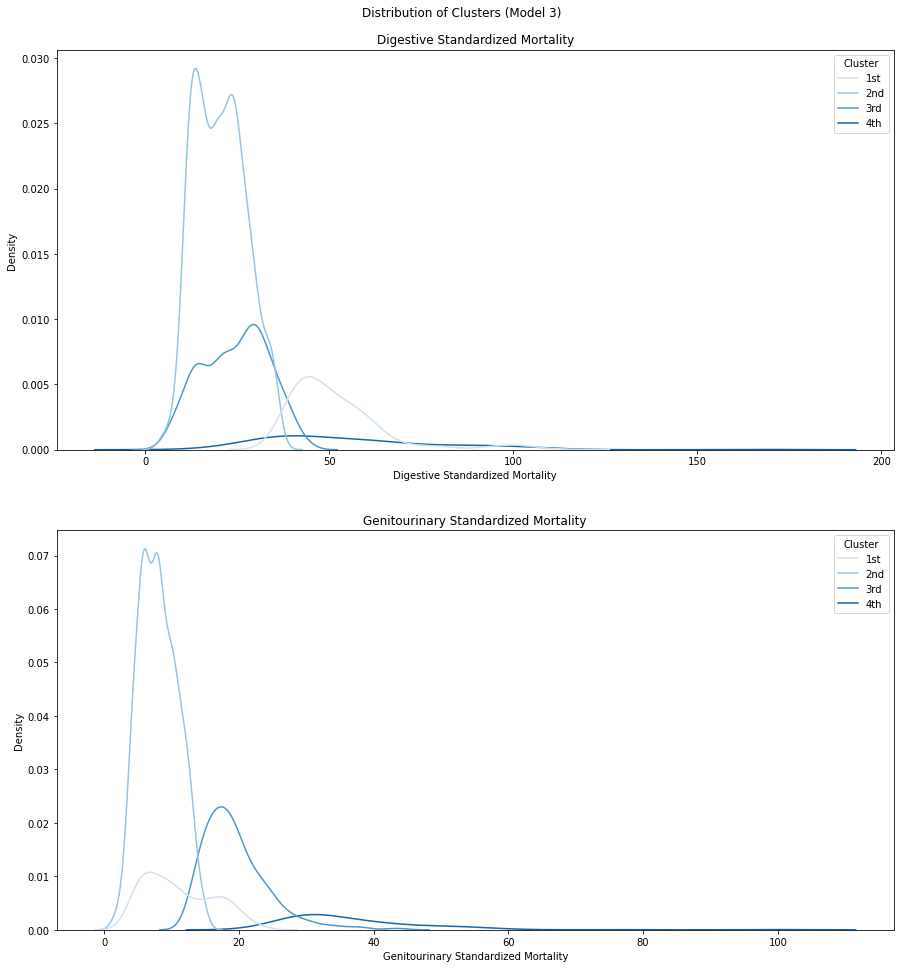

In [ ]:
# Distribution of Clusters 
fig, ax = plt.subplots(2, figsize=(15,15))
fig.suptitle('Distribution of Clusters (Model 3)')
fig.subplots_adjust(top=0.94)

sns.kdeplot(x='Digestive Standardized Mortality', hue='Cluster', hue_order = ['1st', '2nd', '3rd', '4th'], data=df_labeled, ax=ax[0], palette='Blues')
ax[0].set_title('Digestive Standardized Mortality')
sns.kdeplot(x='Genitourinary Standardized Mortality', hue='Cluster', hue_order = ['1st', '2nd', '3rd', '4th'], data=df_labeled, ax=ax[1], palette='Blues')
ax[1].set_title('Genitourinary Standardized Mortality')

plt.show()

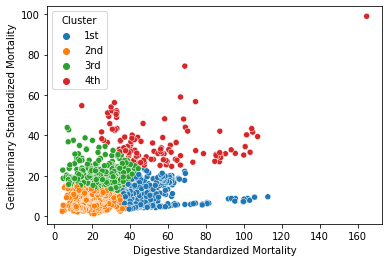

In [ ]:
# Visualization of the clusters

sns.scatterplot(x = df_labeled['Digestive Standardized Mortality'], 
            y = df_labeled['Genitourinary Standardized Mortality'], 
            hue=df_labeled['Cluster'], hue_order = ['1st', '2nd', '3rd', '4th'],
            data=df_labeled)

plt.title('')
#plt.title('Clusters Comparison (Model 3)')
plt.show()

In [ ]:
# Countries in 1st cluster
cluster_1 = df_labeled[df_labeled['Cluster']=='1st']
cluster_1['Country Name'].unique()

array(['Armenia', 'Argentina', 'Azerbaijan', 'Austria', 'Belarus',
       'Belize', 'Chile', 'Costa Rica', 'Croatia', 'Egypt', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'Kazakhstan', 'Kyrgyzstan',
       'Latvia', 'Lithuania', 'Mauritius', 'Mexico',
       'Republic of Moldova', 'Mongolia', 'Romania', 'Russian Federation',
       'Seychelles', 'Slovakia', 'Slovenia', 'Suriname', 'Turkmenistan',
       'Ukraine', 'Uzbekistan'], dtype=object)

In [ ]:
len(cluster_1['Country Name'].unique())

31

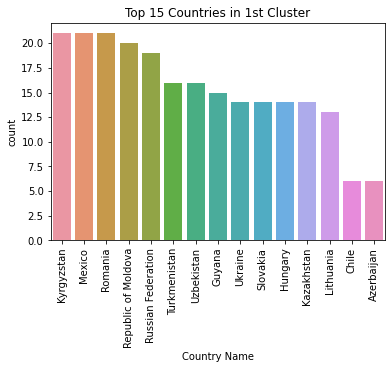

In [ ]:
sns.countplot(data = cluster_1, x='Country Name', order=cluster_1['Country Name'].value_counts().head(15).index)
plt.title('Top 15 Countries in 1st Cluster')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Countries in 2nd cluster
cluster_2 = df_labeled[df_labeled['Cluster']=='2nd']
cluster_2['Country Name'].unique()

array(['Albania', 'Antigua and Barbuda', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados',
       'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Estonia',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'China, Hong Kong SAR',
       'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Republic of Korea',
       'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta',
       'Martinique', 'Mauritius', 'Mayotte', 'Montenegro', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Panama', 'Paraguay',
       'Poland', 'Portugal', 'R?union', 'Russian Federation',
       'Saint Kitts an

In [ ]:
len(cluster_2['Country Name'].unique())

89

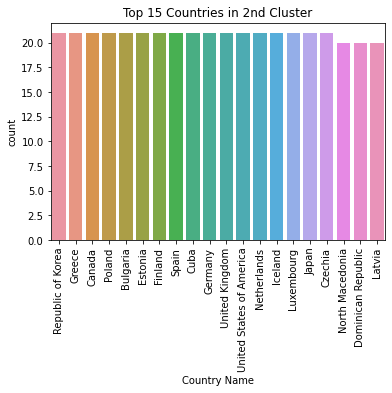

In [ ]:
# Countplot of countries in 2nd cluster
sns.countplot(data = cluster_2, x='Country Name', order=cluster_2['Country Name'].value_counts().head(20).index)
plt.title('Top 15 Countries in 2nd Cluster')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Countries in 3rd cluster
cluster_3 = df_labeled[df_labeled['Cluster']=='3rd']
cluster_3['Country Name'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Armenia', 'Bahamas',
       'Bahrain', 'Barbados', 'Belize', 'Brazil', 'Brunei Darussalam',
       'Bosnia and Herzegovina', 'Chile', 'Colombia', 'Costa Rica',
       'Ecuador', 'Fiji', 'French Guiana', 'Grenada', 'Guadeloupe',
       'China, Hong Kong SAR', 'Iraq', 'Israel', 'Jamaica', 'Kuwait',
       'Lebanon', 'Maldives', 'Mauritius', 'Nicaragua', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Puerto Rico', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Serbia', 'Singapore',
       'South Africa', 'Sri Lanka', 'Suriname', 'Syrian Arab Republic',
       'Tajikistan', 'Thailand', 'Trinidad and Tobago', 'Turkey',
       'Uruguay', 'Venezuela', 'Jordan'], dtype=object)

In [ ]:
len(cluster_3['Country Name'].unique())

47

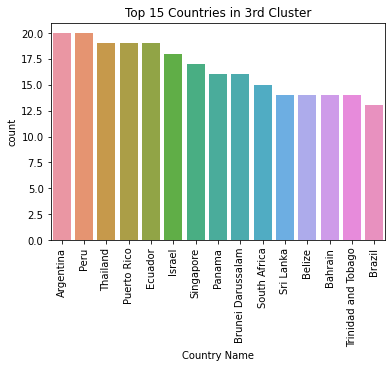

In [ ]:
# Countplot of countries in 3rd cluster
sns.countplot(data = cluster_3, x='Country Name', order=cluster_3['Country Name'].value_counts().head(15).index)
plt.title('Top 15 Countries in 3rd Cluster')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Countries in 4th cluster
cluster_4 = df_labeled[df_labeled['Cluster']=='4th']
cluster_4['Country Name'].unique()

array(['Bahrain', 'Brunei Darussalam', 'Egypt', 'El Salvador', 'Fiji',
       'Grenada', 'Guatemala', 'Kazakhstan', 'Maldives', 'Mauritius',
       'Nicaragua', 'Philippines', 'Seychelles', 'South Africa',
       'Suriname'], dtype=object)

In [ ]:
len(cluster_4['Country Name'].unique())

15

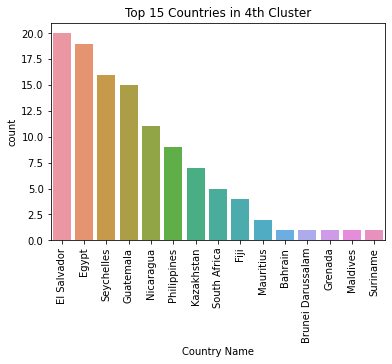

In [ ]:
# Countplot of countries in 4th cluster
sns.countplot(data = cluster_4, x='Country Name', order=cluster_4['Country Name'].value_counts().head(15).index)
plt.title('Top 15 Countries in 4th Cluster')
plt.xticks(rotation=90)
plt.show()

### Exploring changes in Clusters (Socioeconomic Status)

In [ ]:
df_labeled['Cluster_n'] = df_labeled['Cluster'].map({'1st': 1, '2nd': 2, '3rd': 3, '4th': 4})
df_labeled.head()

Country Name  Year  Digestive Mortality Rate  \
0      Albania  1999                  2.215686   
1      Albania  2000                  2.077875   
2      Albania  2001                  2.172621   
3      Albania  2002                  1.877154   
4      Albania  2003                  1.731144   

   Digestive Standardized Mortality  \
0                         12.567855   
1                         14.276391   
2                         11.662889   
3                         10.743199   
4                         10.838188   

   Digestive Mortality per 100000 population  Genitourinary Mortality Rate  \
0                                  10.049209                      1.620915   
1                                  10.950546                      1.724453   
2                                  10.719144                      2.159414   
3                                   9.889273                      1.717134   
4                                  10.023321                      1.441692   

   Genitourinary Standardized Mortality  \
0                              9.256352   
1                             11.730877   
2                             11.686393   
3                              9.886593   
4                              9.055065   

   Genitourinary Mortality per 100000 population  \
0                                       7.351633   
1                                       9.087990   
2                                      10.653982   
3                                       9.046253   
4                                       8.347396   

   Musculoskeletal Mortality Rate  Musculoskeletal Standardized Mortality  \
0                        0.156863                                0.944580   
1                        0.158430                                1.092300   
2                        0.217922                                1.174009   
3                        0.246184                                1.421195   
4                        0.228222                                1.437520   

   ...  Digestive_M_Norm  Genitourinary_MR_Norm  Genitourinary_SM_Norm  \
0  ...          0.062974               0.088167               0.082373   
1  ...          0.070111               0.094527               0.107679   
2  ...          0.068279               0.121244               0.107224   
3  ...          0.061708               0.094077               0.088818   
4  ...          0.062769               0.077158               0.080315   

   Genitourinary_M_Norm  Musculoskeletal_MR_Norm  Musculoskeletal_SM_Norm  \
0              0.104551                 0.090078                 0.065482   
1              0.134832                 0.090978                 0.075722   
2              0.162142                 0.125141                 0.081386   
3              0.134104                 0.141370                 0.098522   
4              0.121916                 0.131055                 0.099654   

   Musculoskeletal_M_Norm  Total  Cluster  Cluster_n  
0                0.062958      1      2nd          2  
1                0.073886      1      2nd          2  
2                0.095145      1      2nd          2  
3                0.114772      1      2nd          2  
4                0.116935      1      2nd          2  

[5 rows x 23 columns]

In [ ]:
# Find the changes in cluster (y-axis) for countries in cluster 1
cluster_1_coun = df_labeled[df_labeled['Country Name'].isin(['Armenia', 'Argentina', 'Azerbaijan', 'Austria', 'Belarus',
       'Belize', 'Chile', 'Costa Rica', 'Croatia', 'Egypt', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'Kazakhstan', 'Kyrgyzstan',
       'Latvia', 'Lithuania', 'Mauritius', 'Mexico',
       'Republic of Moldova', 'Mongolia', 'Romania', 'Russian Federation',
       'Seychelles', 'Slovakia', 'Slovenia', 'Suriname', 'Turkmenistan',
       'Ukraine', 'Uzbekistan'])]

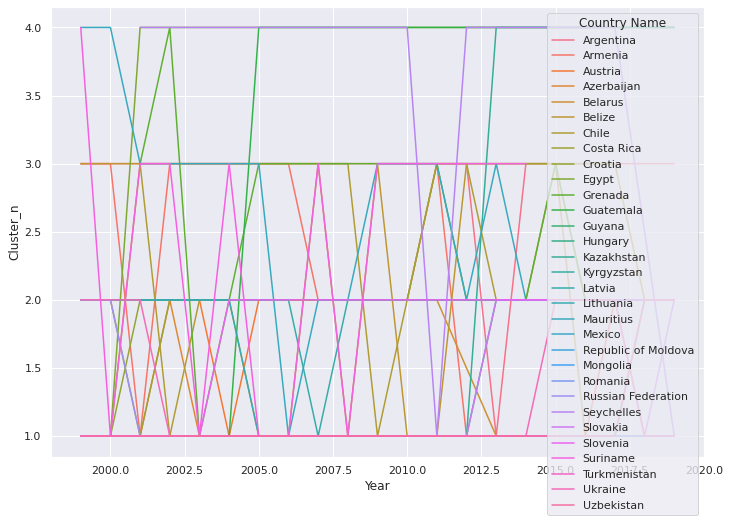

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=cluster_1_coun, x='Year', y='Cluster_n', hue='Country Name')

In [ ]:
cluster_2_coun = df_labeled[df_labeled['Country Name'].isin(['Albania', 'Antigua and Barbuda', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados',
       'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Estonia',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'China, Hong Kong SAR',
       'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Republic of Korea',
       'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta',
       'Martinique', 'Mauritius', 'Mayotte', 'Montenegro', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Panama', 'Paraguay',
       'Poland', 'Portugal', 'R?union', 'Russian Federation',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Serbia', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Turkey',
       'Ukraine', 'United Kingdom', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Jordan'])]

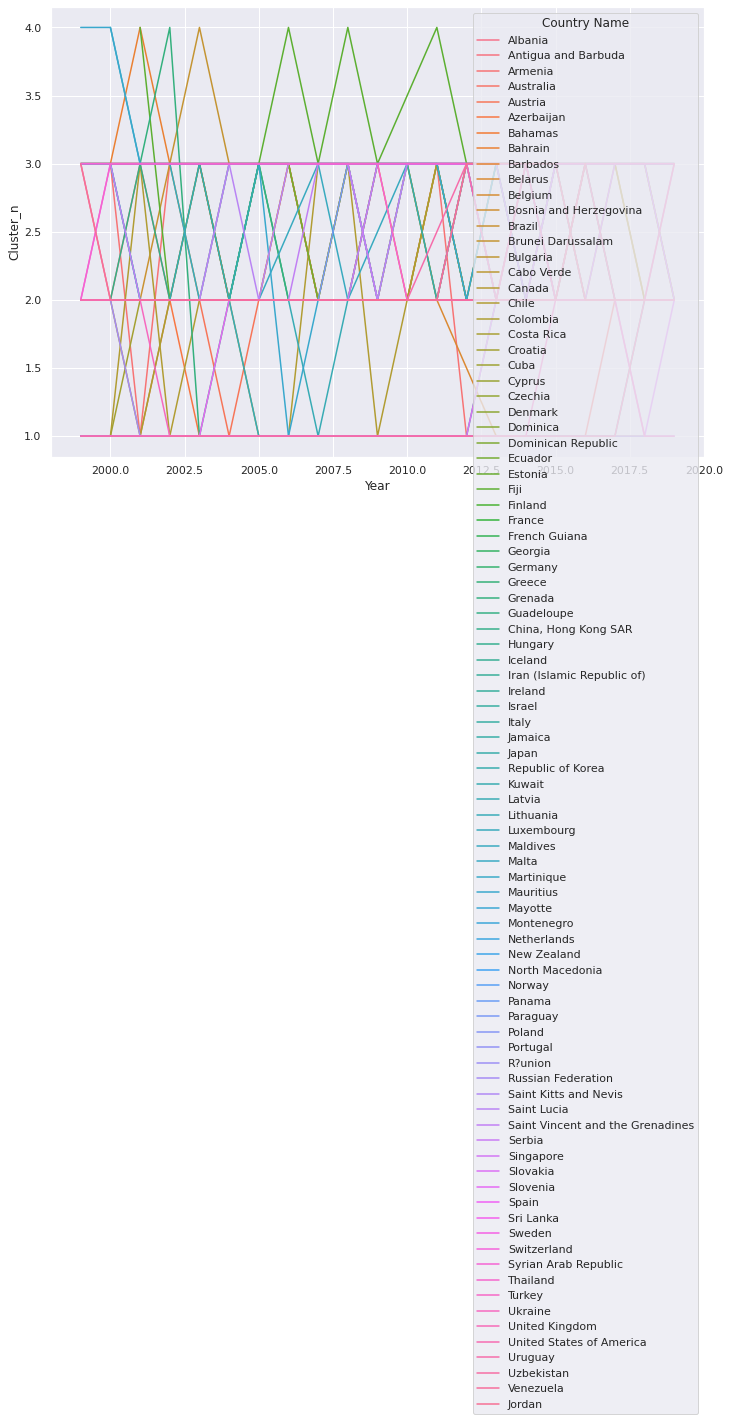

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=cluster_2_coun, x='Year', y='Cluster_n', hue='Country Name')

In [ ]:
cluster_4_coun = df_labeled[df_labeled['Country Name'].isin(['Bahrain', 'Brunei Darussalam', 'Egypt', 'El Salvador', 'Fiji',
       'Grenada', 'Guatemala', 'Kazakhstan', 'Maldives', 'Mauritius',
       'Nicaragua', 'Philippines', 'Seychelles', 'South Africa',
       'Suriname'])]

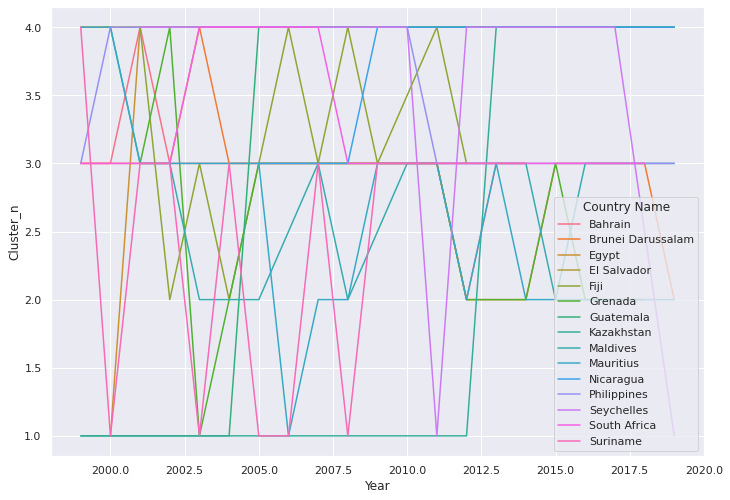

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=cluster_4_coun, x='Year', y='Cluster_n', hue='Country Name')